## 기본 라이브러리 불러오기

In [197]:
# 라이브러리 임포트
import os
import numpy as np
import pandas as pd
import chardet

# 사용자 정의함수 경로 설정
import sys
sys.path.append("G:/내 드라이브/Source/_Custom_Function")
# 사용자 정의함수 불러오기

pd.set_option('display.max_column', None)

import time

import ExcelFile_Merge as em
import ExcelFile_Read as er
import ExcelFile_EDA as ee

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows에서는 'Malgun Gothic' 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

---
### 이상치 제거 함수

In [202]:
def check_outlier(_df, _column):
    # IQR 방법
    Q1 = _df[_column].quantile(0.25)
    Q3 = _df[_column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = _df[~((_df[_column] < lower_bound) | (_df[_column] > upper_bound))]

    return outliers

In [204]:
init_path = 'G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여이력 정보\\'

---
## 이상치패턴 저장데이터 불러오기

In [207]:
start_time = time.time()
df_outlier_rental = pd.read_parquet(init_path + '서울특별시 공공자전거 대여이력 정보_(PRE)고장예측_2023_2024.parquet')

print("read_csv time :", time.time() - start_time)

read_csv time : 0.14190220832824707


In [209]:
df_outlier_rental.head()

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장구분,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수
0,SPB-30006,2024-02-29,2024-01-31,2023-12-31,2024-03-31,페달,1,2,2,2,98170.92,843.0,22.0,168996.89,1623.0,34.0,223726.14,2395.0,46.0
1,SPB-30010,2024-05-18,2024-04-18,2024-03-18,2024-06-18,타이어,1,5,5,5,231653.56,2257.0,25.0,401421.89,3921.0,46.0,586710.32,5621.0,65.0
2,SPB-30014,2024-05-24,2024-04-24,2024-03-24,2024-06-24,기타,1,7,8,9,335138.54,2966.0,26.0,563483.08,5358.0,49.0,679100.64,6344.0,66.0
3,SPB-30018,2024-05-01,2024-04-01,2024-03-01,2024-06-01,기타,1,2,2,2,291259.65,3041.0,23.0,547061.02,5131.0,44.0,664487.39,6357.0,66.0
4,SPB-30022,2024-04-20,2024-03-20,2024-02-20,2024-05-20,기타,1,7,7,7,253399.66,2755.0,28.0,428688.47,4720.0,51.0,526113.69,5605.0,64.0


In [211]:
df_outlier_rental['고장여부'].value_counts()

고장여부
1    28589
0    13307
Name: count, dtype: int64

---
## 23년 자전거대여 월별집계 내역 불러오기
 - 이거는 이상치 제거 한거나, 그냥 집계한거나 모델링 정확도에는 영향 없음

In [214]:
start_time = time.time()

# df_2023_rental = pd.read_parquet(init_path + '서울특별시 공공자전거 대여이력 정보_(PRE)2023_자전거별_월별_집계_20241106.parquet')
# 이상치 제거
df_2023_rental = pd.read_parquet(init_path + '서울특별시 공공자전거 대여이력 정보_(PRE)2023_자전거별_월별_집계_20241109.parquet')

print("read_csv time :", time.time() - start_time)

read_csv time : 0.10314512252807617


In [216]:
df_2023_rental.shape[0]

43833

In [218]:
df_2023_rental.head(5)

,자전거번호,대여일자_count_1,대여일자_count_2,대여일자_count_3,대여일자_count_4,대여일자_count_5,대여일자_count_6,대여일자_count_7,대여일자_count_8,대여일자_count_9,대여일자_count_10,대여일자_count_11,대여일자_count_12,이용거리(M)_mean_1,이용거리(M)_mean_2,이용거리(M)_mean_3,이용거리(M)_mean_4,이용거리(M)_mean_5,이용거리(M)_mean_6,이용거리(M)_mean_7,이용거리(M)_mean_8,이용거리(M)_mean_9,이용거리(M)_mean_10,이용거리(M)_mean_11,이용거리(M)_mean_12,이용거리(M)_sum_1,이용거리(M)_sum_2,이용거리(M)_sum_3,이용거리(M)_sum_4,이용거리(M)_sum_5,이용거리(M)_sum_6,이용거리(M)_sum_7,이용거리(M)_sum_8,이용거리(M)_sum_9,이용거리(M)_sum_10,이용거리(M)_sum_11,이용거리(M)_sum_12,이용시간(분)_mean_1,이용시간(분)_mean_2,이용시간(분)_mean_3,이용시간(분)_mean_4,이용시간(분)_mean_5,이용시간(분)_mean_6,이용시간(분)_mean_7,이용시간(분)_mean_8,이용시간(분)_mean_9,이용시간(분)_mean_10,이용시간(분)_mean_11,이용시간(분)_mean_12,이용시간(분)_sum_1,이용시간(분)_sum_2,이용시간(분)_sum_3,이용시간(분)_sum_4,이용시간(분)_sum_5,이용시간(분)_sum_6,이용시간(분)_sum_7,이용시간(분)_sum_8,이용시간(분)_sum_9,이용시간(분)_sum_10,이용시간(분)_sum_11,이용시간(분)_sum_12,대여일자_count(mean),이용거리(M)_mean(mean),이용거리(M)_sum(mean)
0,SPB-30001,126.0,111.0,195.0,104.0,121.0,162.0,141.0,119.0,175.0,123.0,117.0,46.0,1509.563770,1990.959459,1861.684385,2810.103942,2210.984215,2083.752438,2083.341702,1678.199244,2035.389057,1930.857480,1383.724402,1480.883913,190205.035,220996.500,363028.455,292250.810,267529.090,337567.895,293751.180,199705.710,356193.085,237495.470,161895.755,68120.660,13.313492,17.509009,16.756410,25.221154,18.066116,16.429012,18.312057,13.785714,17.994286,17.434959,15.824786,15.141304,1677.5,1943.5,3267.5,2623.0,2186.0,2661.5,2582.0,1640.5,3149.0,2144.5,1851.5,696.5,128.333333,1921.620334,249061.637083
1,SPB-30006,11.0,80.0,150.0,139.0,199.0,193.0,202.0,143.0,125.0,159.0,31.0,110.0,1468.723636,1464.099375,1731.501267,1549.403058,2005.412286,2019.213938,1799.872104,1478.376469,2169.298160,1836.708836,1642.062258,1117.251682,16155.960,117127.950,259725.190,215367.025,399077.045,389708.290,363574.165,211407.835,271162.270,292036.705,50903.930,122897.685,10.636364,15.668750,17.393333,17.043165,16.932161,20.290155,18.039604,15.601399,20.920000,17.496855,17.596774,10.854545,117.0,1253.5,2609.0,2369.0,3369.5,3916.0,3644.0,2231.0,2615.0,2782.0,545.5,1194.0,128.500000,1690.160256,225762.004167
2,SPB-30008,42.0,42.0,19.0,83.0,181.0,120.0,143.0,179.0,116.0,105.0,93.0,40.0,1222.382143,1878.965714,2040.780789,1768.236265,1883.621105,1818.638708,2201.944126,2379.384050,2250.111121,1989.498095,1796.551290,1942.770500,51340.050,78916.560,38774.835,146763.610,340935.420,218236.645,314878.010,425909.745,261012.890,208897.300,167079.270,77710.820,11.892857,15.785714,18.868421,13.963855,15.314917,14.795833,17.786713,19.332402,20.331897,17.995238,15.833333,17.112500,499.5,663.0,358.5,1159.0,2772.0,1775.5,2543.5,3460.5,2358.5,1889.5,1472.5,684.5,96.916667,1931.073659,194204.596250
3,SPB-30009,NaN,70.0,111.0,172.0,20.0,12.0,49.0,117.0,78.0,94.0,NaN,NaN,NaN,1705.262071,1670.518243,1710.870378,2293.793250,2103.523750,1450.928265,1721.559573,1895.443269,1638.044362,NaN,NaN,NaN,119368.345,185427.525,294269.705,45875.865,25242.285,71095.485,201422.470,147844.575,153976.170,NaN,NaN,NaN,14.335714,14.932432,15.994186,24.350000,20.125000,11.908163,19.782051,19.185897,19.441489,NaN,NaN,NaN,1003.5,1657.5,2751.0,487.0,241.5,583.5,2314.5,1496.5,1827.5,NaN,NaN,80.333333,1798.882573,138280.269444
4,SPB-30010,65.0,115.0,151.0,167.0,163.0,234.0,151.0,102.0,135.0,150.0,51.0,37.0,1326.902231,1596.688783,1546.319967,1723.315958,1568.842331,1808.002671,1755.377682,1524.132794,1715.053333,1646.855400,1190.070098,1532.296216,86248.645,183619.210,233494.315,287793.765,255721.300,423072.625,265062.030,155461.545,231532.200,247028.310,60693.575,56694.960,12.815385,14.208696,15.387417,17.269461,18.260736,16.243590,15.423841,13.372549,14.951852,14.800000,12.254902,15.486486,833.0,1634.0,2323.5,2884.0,2976.5,3801.0,2329.0,1364.0,2018.5,2220.0,625.0,573.0,126.750000,1577.821455,207201.873333


In [220]:
df_2023_rental.columns

Index(['자전거번호', '대여일자_count_1', '대여일자_count_2', '대여일자_count_3', '대여일자_count_4',
       '대여일자_count_5', '대여일자_count_6', '대여일자_count_7', '대여일자_count_8',
       '대여일자_count_9', '대여일자_count_10', '대여일자_count_11', '대여일자_count_12',
       '이용거리(M)_mean_1', '이용거리(M)_mean_2', '이용거리(M)_mean_3', '이용거리(M)_mean_4',
       '이용거리(M)_mean_5', '이용거리(M)_mean_6', '이용거리(M)_mean_7', '이용거리(M)_mean_8',
       '이용거리(M)_mean_9', '이용거리(M)_mean_10', '이용거리(M)_mean_11',
       '이용거리(M)_mean_12', '이용거리(M)_sum_1', '이용거리(M)_sum_2', '이용거리(M)_sum_3',
       '이용거리(M)_sum_4', '이용거리(M)_sum_5', '이용거리(M)_sum_6', '이용거리(M)_sum_7',
       '이용거리(M)_sum_8', '이용거리(M)_sum_9', '이용거리(M)_sum_10', '이용거리(M)_sum_11',
       '이용거리(M)_sum_12', '이용시간(분)_mean_1', '이용시간(분)_mean_2', '이용시간(분)_mean_3',
       '이용시간(분)_mean_4', '이용시간(분)_mean_5', '이용시간(분)_mean_6', '이용시간(분)_mean_7',
       '이용시간(분)_mean_8', '이용시간(분)_mean_9', '이용시간(분)_mean_10',
       '이용시간(분)_mean_11', '이용시간(분)_mean_12', '이용시간(분)_sum_1', '이용시간(분)_sum_2',
       '이용시간(분)_sum_3', '이

In [222]:
df_2023_rental = df_2023_rental[['자전거번호', '대여일자_count(mean)', '이용거리(M)_mean(mean)', '이용거리(M)_sum(mean)']]

In [224]:
df_outlier_rental = pd.merge(df_outlier_rental, df_2023_rental, on='자전거번호', how='inner')

In [226]:
df_outlier_rental.head()

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장구분,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수,대여일자_count(mean),이용거리(M)_mean(mean),이용거리(M)_sum(mean)
0,SPB-30006,2024-02-29,2024-01-31,2023-12-31,2024-03-31,페달,1,2,2,2,98170.92,843.0,22.0,168996.89,1623.0,34.0,223726.14,2395.0,46.0,128.500000,1690.160256,225762.004167
1,SPB-30010,2024-05-18,2024-04-18,2024-03-18,2024-06-18,타이어,1,5,5,5,231653.56,2257.0,25.0,401421.89,3921.0,46.0,586710.32,5621.0,65.0,126.750000,1577.821455,207201.873333
2,SPB-30014,2024-05-24,2024-04-24,2024-03-24,2024-06-24,기타,1,7,8,9,335138.54,2966.0,26.0,563483.08,5358.0,49.0,679100.64,6344.0,66.0,101.000000,1822.861935,190463.241364
3,SPB-30018,2024-05-01,2024-04-01,2024-03-01,2024-06-01,기타,1,2,2,2,291259.65,3041.0,23.0,547061.02,5131.0,44.0,664487.39,6357.0,66.0,84.636364,1627.166124,140999.660000
4,SPB-30022,2024-04-20,2024-03-20,2024-02-20,2024-05-20,기타,1,7,7,7,253399.66,2755.0,28.0,428688.47,4720.0,51.0,526113.69,5605.0,64.0,77.300000,1468.217188,121309.531000


---
### 23년 월별평균 <-> 한달 이전데이터 비교 컬럼 추가

In [229]:
# 고장 자전거는 23년 월별평균보다, 이전 한달 데이터가 더 적을 것이라는 가정
df_outlier_rental['이용횟수_비교'] = ee.ss_compare(df_outlier_rental['대여일자_count(mean)'], df_outlier_rental['이전일자_1mon_이용횟수'])
df_outlier_rental['이용거리_비교'] = ee.ss_compare(df_outlier_rental['이용거리(M)_sum(mean)'], df_outlier_rental['이전일자_1mon_이용거리'])

In [231]:
df_outlier_rental['이용횟수_비교(절대값)'] = df_outlier_rental['이용횟수_비교'].abs()
df_outlier_rental['이용거리_비교(절대값)'] = df_outlier_rental['이용거리_비교'].abs()

---
### 추가 독립변수로 사용할 피쳐변수 추가생성
- 이상패턴_비율 : 이전 한달의 전체 이용횟수에서 이상패턴의 비율을 구한다.
  
- 이상패턴_7-5min_횟수 : "이상패턴_7분 횟수"와 "이상패턴_5분_횟수"의 차이를 구한다.
- 이상패턴_10-5min_횟수 : "이상패턴_10분 횟수"와 "이상패턴_5분_횟수"의 차이를 구한다.
- 이상패턴_10-7min_횟수 : "이상패턴_10분 횟수"와 "이상패턴_7분_횟수"의 차이를 구한다.
  
- 이전일자_3-1mon_이용횟수 : "이전일자_3달_이용횟수"와 "이전일자_1달_이용횟수"의 차이를 구한다.
- 이전일자_3-2mon_이용횟수 : "이전일자_3달_이용횟수"와 "이전일자_2달_이용횟수"의 차이를 구한다.
- 이전일자_2-1mon_이용횟수 : "이전일자_2달_이용횟수"와 "이전일자_1달_이용횟수"의 차이를 구한다.

In [234]:
df_outlier_rental['이상패턴_비율'] = df_outlier_rental['이상패턴_5min_횟수'] / df_outlier_rental['이전일자_1mon_이용횟수'] * 100

df_outlier_rental['이상패턴_7-5min_횟수'] = df_outlier_rental['이상패턴_7min_횟수'] - df_outlier_rental['이상패턴_5min_횟수']
df_outlier_rental['이상패턴_10-5min_횟수'] = df_outlier_rental['이상패턴_10min_횟수'] - df_outlier_rental['이상패턴_5min_횟수']
df_outlier_rental['이상패턴_10-7min_횟수'] = df_outlier_rental['이상패턴_10min_횟수'] - df_outlier_rental['이상패턴_7min_횟수']

df_outlier_rental['이전일자_3-1mon_이용횟수'] = df_outlier_rental['이전일자_3mon_이용횟수'] - df_outlier_rental['이전일자_1mon_이용횟수']
df_outlier_rental['이전일자_3-2mon_이용횟수'] = df_outlier_rental['이전일자_3mon_이용횟수'] - df_outlier_rental['이전일자_2mon_이용횟수']
df_outlier_rental['이전일자_2-1mon_이용횟수'] = df_outlier_rental['이전일자_2mon_이용횟수'] - df_outlier_rental['이전일자_1mon_이용횟수']

In [236]:
df_outlier_rental.head()

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장구분,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수,대여일자_count(mean),이용거리(M)_mean(mean),이용거리(M)_sum(mean),이용횟수_비교,이용거리_비교,이용횟수_비교(절대값),이용거리_비교(절대값),이상패턴_비율,이상패턴_7-5min_횟수,이상패턴_10-5min_횟수,이상패턴_10-7min_횟수,이전일자_3-1mon_이용횟수,이전일자_3-2mon_이용횟수,이전일자_2-1mon_이용횟수
0,SPB-30006,2024-02-29,2024-01-31,2023-12-31,2024-03-31,페달,1,2,2,2,98170.92,843.0,22.0,168996.89,1623.0,34.0,223726.14,2395.0,46.0,128.500000,1690.160256,225762.004167,-82.88,-56.52,82.88,56.52,9.090909,0,0,0,24.0,12.0,12.0
1,SPB-30010,2024-05-18,2024-04-18,2024-03-18,2024-06-18,타이어,1,5,5,5,231653.56,2257.0,25.0,401421.89,3921.0,46.0,586710.32,5621.0,65.0,126.750000,1577.821455,207201.873333,-80.28,11.80,80.28,11.80,20.000000,0,0,0,40.0,19.0,21.0
2,SPB-30014,2024-05-24,2024-04-24,2024-03-24,2024-06-24,기타,1,7,8,9,335138.54,2966.0,26.0,563483.08,5358.0,49.0,679100.64,6344.0,66.0,101.000000,1822.861935,190463.241364,-74.26,75.96,74.26,75.96,26.923077,1,2,1,40.0,17.0,23.0
3,SPB-30018,2024-05-01,2024-04-01,2024-03-01,2024-06-01,기타,1,2,2,2,291259.65,3041.0,23.0,547061.02,5131.0,44.0,664487.39,6357.0,66.0,84.636364,1627.166124,140999.660000,-72.82,106.57,72.82,106.57,8.695652,0,0,0,43.0,22.0,21.0
4,SPB-30022,2024-04-20,2024-03-20,2024-02-20,2024-05-20,기타,1,7,7,7,253399.66,2755.0,28.0,428688.47,4720.0,51.0,526113.69,5605.0,64.0,77.300000,1468.217188,121309.531000,-63.78,108.89,63.78,108.89,25.000000,0,0,0,36.0,13.0,23.0


In [23]:
# df_outlier_rental['이상패턴_비율'] = (df_outlier_rental['이상패턴_5min_횟수'] / df_outlier_rental['대여일자_count(mean)']) * 100
#df_outlier_rental['이상패턴_비율'] = (df_outlier_rental['이상패턴_5min_횟수'] / df_outlier_rental['대여일자_count(mean)'])
df_outlier_rental['이상패턴_비율'] = df_outlier_rental['이상패턴_5min_횟수'] / df_outlier_rental['이전일자_1mon_이용횟수'] * 100

In [24]:
# "이용횟수_비교" 컬럼을 기준으로 "이용횟수_비교(이진)" 컬럼 생성
df_outlier_rental['이용횟수_비교(이진)'] = df_outlier_rental['이용횟수_비교'].apply(lambda x: 1 if x < 0 else 0)

In [25]:
df_outlier_rental['이상패턴_7-5min_횟수'] = df_outlier_rental['이상패턴_7min_횟수'] - df_outlier_rental['이상패턴_5min_횟수']
df_outlier_rental['이상패턴_10-5min_횟수'] = df_outlier_rental['이상패턴_10min_횟수'] - df_outlier_rental['이상패턴_5min_횟수']
df_outlier_rental['이상패턴_10-7min_횟수'] = df_outlier_rental['이상패턴_10min_횟수'] - df_outlier_rental['이상패턴_7min_횟수']

In [26]:
df_outlier_rental['이전일자_3-1mon_이용횟수'] = df_outlier_rental['이전일자_3mon_이용횟수'] - df_outlier_rental['이전일자_1mon_이용횟수']
df_outlier_rental['이전일자_3-2mon_이용횟수'] = df_outlier_rental['이전일자_3mon_이용횟수'] - df_outlier_rental['이전일자_2mon_이용횟수']
df_outlier_rental['이전일자_2-1mon_이용횟수'] = df_outlier_rental['이전일자_2mon_이용횟수'] - df_outlier_rental['이전일자_1mon_이용횟수']

In [28]:
df_outlier_rental[df_outlier_rental['고장여부'] == 0].head(10)

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장구분,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수,대여일자_count(mean),이용거리(M)_mean(mean),이용거리(M)_sum(mean),이용횟수_비교,이용거리_비교,이용횟수_비교(절대값),이용거리_비교(절대값),이상패턴_비율,이용횟수_비교(이진),이상패턴_7-5min_횟수,이상패턴_10-5min_횟수,이상패턴_10-7min_횟수,이전일자_3-1mon_이용횟수,이전일자_3-2mon_이용횟수,이전일자_2-1mon_이용횟수
28418,SPB-30001,2024-05-28,2024-04-28,2024-03-28,2024-06-28,,0,5,5,5,240874.96,2496.0,161.0,452068.57,4878.0,302.0,572952.52,5969.0,396.0,128.333333,1921.620334,249061.637083,25.45,-3.29,25.45,3.29,3.105590,0,0,0,0,235.0,94.0,141.0
28419,SPB-30008,2024-04-20,2024-03-20,2024-02-20,2024-05-20,,0,0,0,0,228641.47,1732.0,87.0,553440.37,4827.0,200.0,669926.15,5720.0,262.0,96.916667,1931.073659,194204.596250,-10.23,17.73,10.23,17.73,0.000000,1,0,0,0,175.0,62.0,113.0
28420,SPB-30032,2024-05-30,2024-04-30,2024-03-30,2024-06-30,,0,3,3,3,66916.90,1216.0,65.0,72061.61,1283.0,70.0,81573.03,1405.0,80.0,113.272727,1019.159751,121656.539545,-42.62,-45.00,42.62,45.00,4.615385,1,0,0,0,15.0,10.0,5.0
28421,SPB-30055,2024-05-28,2024-04-28,2024-03-28,2024-06-28,,0,3,3,3,169441.86,1834.0,112.0,480921.52,4921.0,237.0,614836.48,6270.0,288.0,142.500000,1560.228445,227373.812500,-21.40,-25.48,21.40,25.48,2.678571,1,0,0,0,176.0,51.0,125.0
28422,SPB-30058,2024-05-30,2024-04-30,2024-03-30,2024-06-30,,0,0,0,2,237741.17,2018.0,124.0,237741.17,2018.0,124.0,360962.08,3014.0,186.0,118.000000,1725.556503,212865.026250,5.08,11.69,5.08,11.69,0.000000,0,0,2,2,62.0,62.0,0.0
28423,SPB-30063,2024-05-30,2024-04-30,2024-03-30,2024-06-30,,0,2,2,3,461848.08,4211.0,202.0,842118.51,7449.0,359.0,1231022.23,10783.0,518.0,116.666667,1705.341693,206580.417083,73.14,123.57,73.14,123.57,0.990099,0,0,1,1,316.0,159.0,157.0
28424,SPB-30066,2024-05-30,2024-04-30,2024-03-30,2024-06-30,,0,5,5,6,178554.35,1772.0,120.0,198597.03,1912.0,136.0,348222.74,3977.0,234.0,112.166667,1409.896547,162714.720417,6.98,9.73,6.98,9.73,4.166667,0,0,1,1,114.0,98.0,16.0
28425,SPB-30068,2024-05-29,2024-04-29,2024-03-29,2024-06-29,,0,2,2,2,245131.52,2368.0,94.0,607945.62,6114.0,245.0,842235.06,7832.0,323.0,116.818182,1825.332373,207451.024091,-19.53,18.16,19.53,18.16,2.127660,1,0,0,0,229.0,78.0,151.0
28426,SPB-30073,2024-05-29,2024-04-29,2024-03-29,2024-06-29,,0,2,2,2,387784.50,2927.0,173.0,489282.48,3916.0,225.0,535527.60,4226.0,241.0,151.500000,1854.348664,285657.408750,14.19,35.75,14.19,35.75,1.156069,0,0,0,0,68.0,16.0,52.0
28427,SPB-30075,2024-05-24,2024-04-24,2024-03-24,2024-06-24,,0,3,4,4,404535.01,3619.0,166.0,729001.37,6032.0,317.0,949481.58,7818.0,398.0,121.250000,1828.083440,233777.994167,36.91,73.04,36.91,73.04,1.807229,0,1,1,0,232.0,81.0,151.0


In [29]:
df_Bike_latest_2 = df_outlier_rental

In [30]:
df_Bike_latest_2.head()

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장구분,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수,대여일자_count(mean),이용거리(M)_mean(mean),이용거리(M)_sum(mean),이용횟수_비교,이용거리_비교,이용횟수_비교(절대값),이용거리_비교(절대값),이상패턴_비율,이용횟수_비교(이진),이상패턴_7-5min_횟수,이상패턴_10-5min_횟수,이상패턴_10-7min_횟수,이전일자_3-1mon_이용횟수,이전일자_3-2mon_이용횟수,이전일자_2-1mon_이용횟수
0,SPB-30006,2024-02-29,2024-01-31,2023-12-31,2024-03-31,페달,1,2,2,2,98170.92,843.0,74.0,168996.89,1623.0,128.0,223726.14,2395.0,171.0,128.500000,1690.160256,225762.004167,-42.41,-56.52,42.41,56.52,2.702703,1,0,0,0,97.0,43.0,54.0
1,SPB-30010,2024-05-18,2024-04-18,2024-03-18,2024-06-18,타이어,1,5,5,5,231653.56,2257.0,121.0,401421.89,3921.0,207.0,586710.32,5621.0,304.0,126.750000,1577.821455,207201.873333,-4.54,11.80,4.54,11.80,4.132231,1,0,0,0,183.0,97.0,86.0
2,SPB-30014,2024-05-24,2024-04-24,2024-03-24,2024-06-24,기타,1,7,8,9,335138.54,2966.0,156.0,563483.08,5358.0,272.0,679100.64,6344.0,344.0,101.000000,1822.861935,190463.241364,54.46,75.96,54.46,75.96,4.487179,0,1,2,1,188.0,72.0,116.0
3,SPB-30018,2024-05-01,2024-04-01,2024-03-01,2024-06-01,기타,1,2,2,2,291259.65,3041.0,153.0,547061.02,5131.0,254.0,664487.39,6357.0,328.0,84.636364,1627.166124,140999.660000,80.77,106.57,80.77,106.57,1.307190,0,0,0,0,175.0,74.0,101.0
4,SPB-30022,2024-04-20,2024-03-20,2024-02-20,2024-05-20,기타,1,7,7,7,253399.66,2755.0,143.0,428688.47,4720.0,248.0,526113.69,5605.0,288.0,77.300000,1468.217188,121309.531000,84.99,108.89,84.99,108.89,4.895105,0,0,0,0,145.0,40.0,105.0


---
### 이용거리_비교 - 무한값(inf) 설정관련

In [32]:
# 무한대 값 확인
inf_check = df_Bike_latest_2.isin([np.inf, -np.inf])

print("무한대 값 위치:")
print(inf_check)

# 무한대 값이 있는 열 확인
columns_with_inf = df_Bike_latest_2.columns[inf_check.any()].tolist()
print("\n무한대 값이 있는 열:", columns_with_inf)

# 무한대 값의 개수 확인
inf_count = df_Bike_latest_2.isin([np.inf, -np.inf]).sum().sum()
print("\n전체 무한대 값의 개수:", inf_count)

무한대 값 위치:
       자전거번호  이전일자_1mon  이전일자_2mon  이전일자_3mon  등록대여일자   고장구분   고장여부  \
0      False      False      False      False   False  False  False   
1      False      False      False      False   False  False  False   
2      False      False      False      False   False  False  False   
3      False      False      False      False   False  False  False   
4      False      False      False      False   False  False  False   
...      ...        ...        ...        ...     ...    ...    ...   
41556  False      False      False      False   False  False  False   
41557  False      False      False      False   False  False  False   
41558  False      False      False      False   False  False  False   
41559  False      False      False      False   False  False  False   
41560  False      False      False      False   False  False  False   

       이상패턴_5min_횟수  이상패턴_7min_횟수  이상패턴_10min_횟수  이전일자_1mon_이용거리  \
0             False         False          False           False   
1

In [33]:
df_Bike_latest_2 = df_Bike_latest_2.replace([np.inf, -np.inf], np.nan).dropna()

In [34]:
# 무한대 값의 개수 확인
inf_count = df_Bike_latest_2.isin([np.inf, -np.inf]).sum().sum()
print("\n전체 무한대 값의 개수:", inf_count)


전체 무한대 값의 개수: 0


---
### 결측치 확인 및 제거

In [36]:
df_Bike_latest_2.isnull().mean()

자전거번호                 0.0
이전일자_1mon             0.0
이전일자_2mon             0.0
이전일자_3mon             0.0
등록대여일자                0.0
고장구분                  0.0
고장여부                  0.0
이상패턴_5min_횟수          0.0
이상패턴_7min_횟수          0.0
이상패턴_10min_횟수         0.0
이전일자_1mon_이용거리        0.0
이전일자_1mon_이용시간        0.0
이전일자_1mon_이용횟수        0.0
이전일자_2mon_이용거리        0.0
이전일자_2mon_이용시간        0.0
이전일자_2mon_이용횟수        0.0
이전일자_3mon_이용거리        0.0
이전일자_3mon_이용시간        0.0
이전일자_3mon_이용횟수        0.0
대여일자_count(mean)      0.0
이용거리(M)_mean(mean)    0.0
이용거리(M)_sum(mean)     0.0
이용횟수_비교               0.0
이용거리_비교               0.0
이용횟수_비교(절대값)          0.0
이용거리_비교(절대값)          0.0
이상패턴_비율               0.0
이용횟수_비교(이진)           0.0
이상패턴_7-5min_횟수        0.0
이상패턴_10-5min_횟수       0.0
이상패턴_10-7min_횟수       0.0
이전일자_3-1mon_이용횟수      0.0
이전일자_3-2mon_이용횟수      0.0
이전일자_2-1mon_이용횟수      0.0
dtype: float64

In [37]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


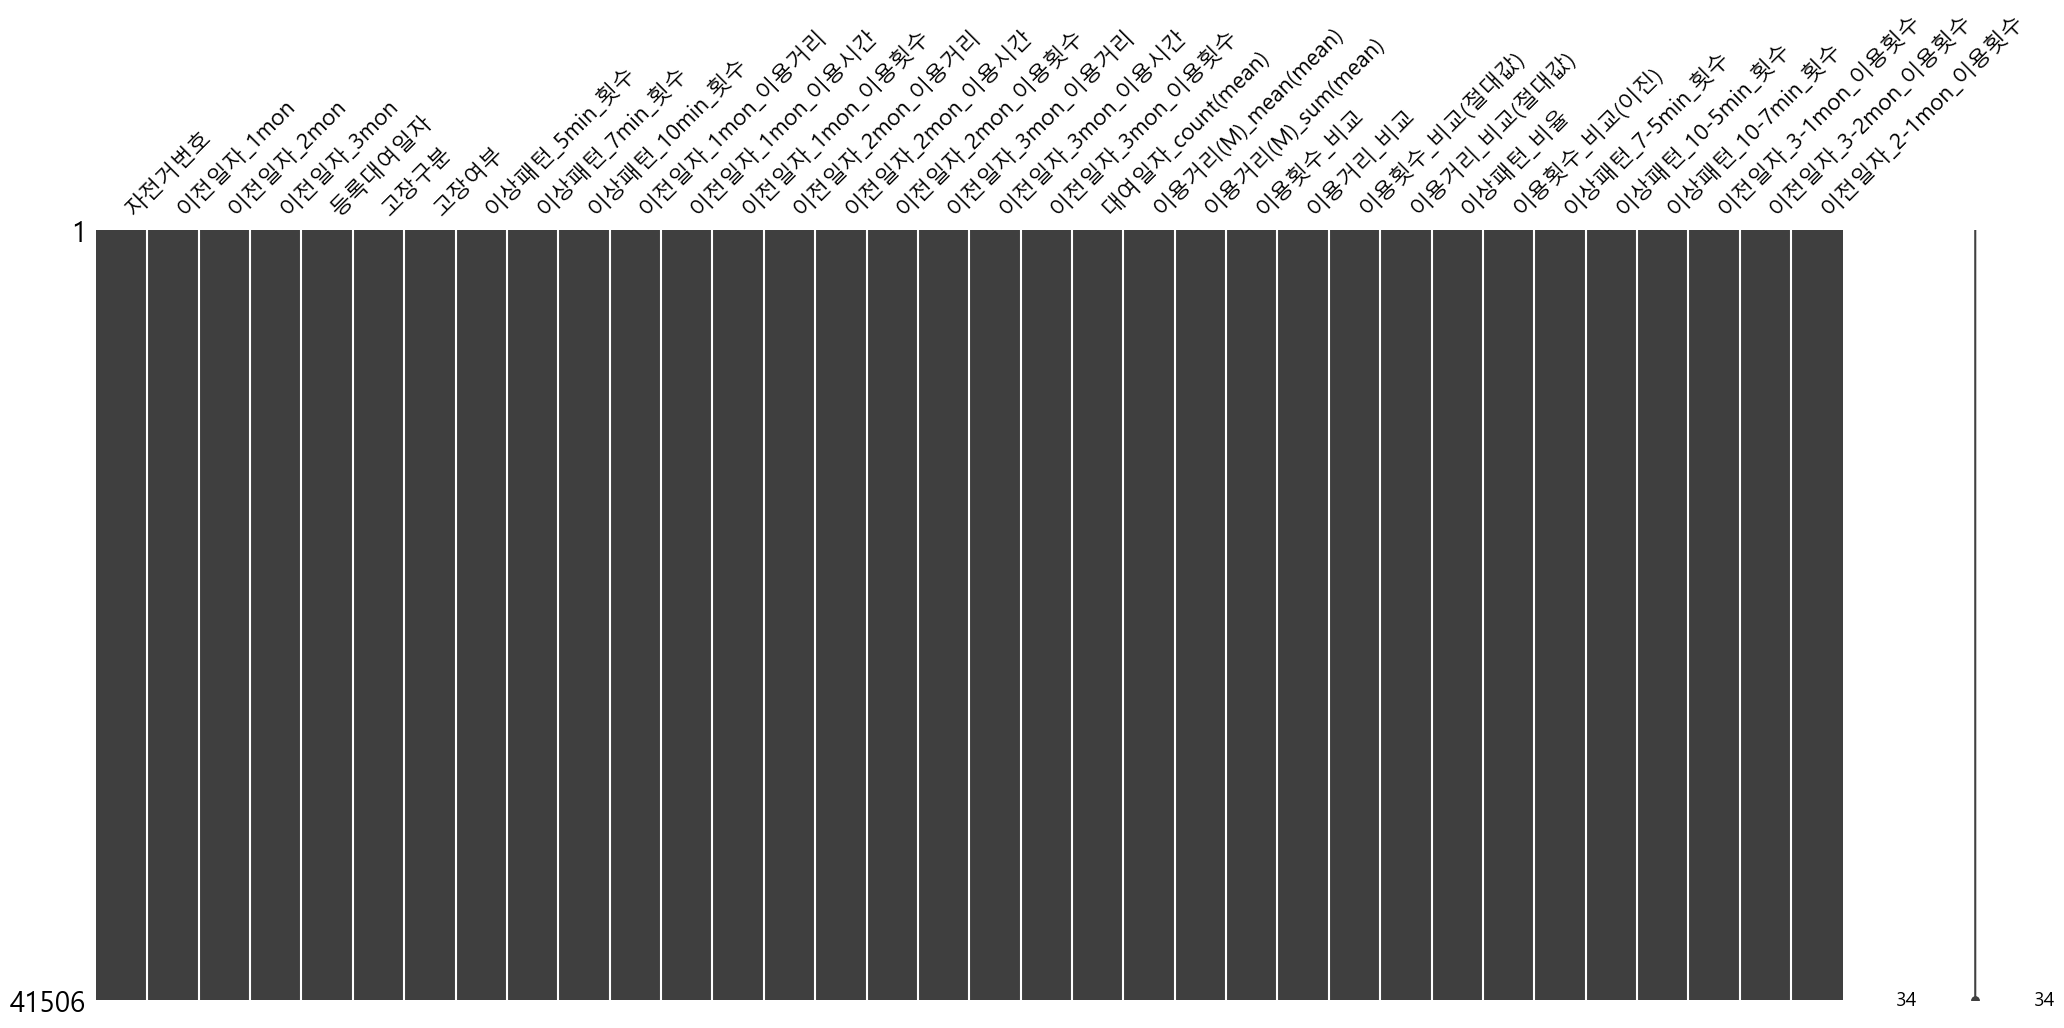

In [38]:
import missingno as msno
# 결측치 매트릭스 시각화
msno.matrix(df_Bike_latest_2)
plt.show()

In [39]:
df_Bike_latest_2 = df_Bike_latest_2.dropna()

---
## 고장횟수 별 - 고장비율
 - 고장 : 24년의 마지막고장신고
 - 정상 : 24년의 마지막 대여일

### [전체] 고장여부 비율

In [42]:
counts = df_Bike_latest_2['고장여부'].value_counts()
total = counts.sum()   # 총 데이터 개수
percentage = counts / total * 100   # 비율 계산
print(f'total : {total}')
print(f'counts : {counts}')
print(f'percentage : {percentage}')

total : 41506
counts : 고장여부
1    28367
0    13139
Name: count, dtype: int64
percentage : 고장여부
1    68.344336
0    31.655664
Name: count, dtype: float64


In [43]:
df_Bike_latest_2_0 = df_Bike_latest_2[df_Bike_latest_2['고장여부'] == 0][:13139]   # 6477 / 13139
df_Bike_latest_2_1 = df_Bike_latest_2[df_Bike_latest_2['고장여부'] == 1][:13139]

In [44]:
df_Bike_latest_2 = pd.concat([df_Bike_latest_2_0, df_Bike_latest_2_1], axis = 0)

In [326]:
print(f'df_Bike_latest_2_0.shape[0] : {df_Bike_latest_2_0.shape[0]}')
print(f'df_Bike_latest_2_1.shape[0] : {df_Bike_latest_2_1.shape[0]}')
print(f'df_Bike_latest_2.shape[0] : {df_Bike_latest_2.shape[0]}')

df_Bike_latest_2_0.shape[0] : 13139
df_Bike_latest_2_1.shape[0] : 13139
df_Bike_latest_2.shape[0] : 26278


---
## 고장여부 에 따른 고장횟수

In [47]:
# 데이터 준비
gojang_counts = df_Bike_latest_2['고장여부'].value_counts()

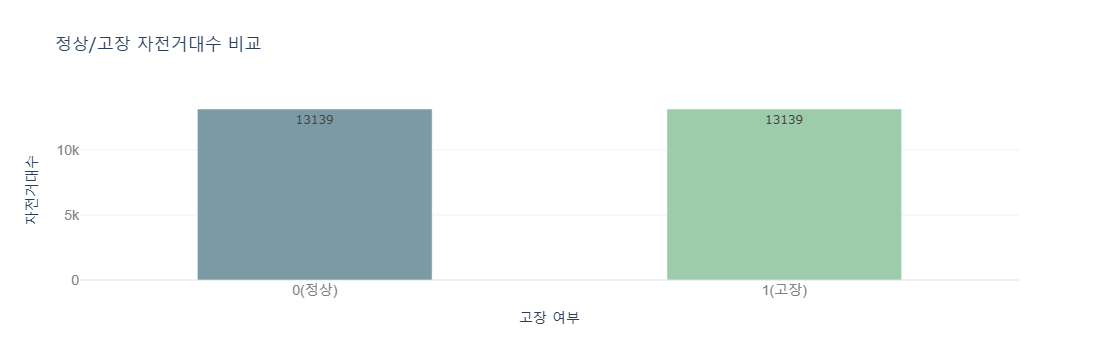

In [350]:
import plotly.graph_objects as go

# Plotly로 막대 그래프 그리기
fig = go.Figure()

# 고장 여부 막대 추가
fig.add_trace(go.Bar(
    x=gojang_counts.index,
    y=gojang_counts.values,
    
    # marker=dict(color=['skyblue', 'lightcoral']),
    marker=dict(color=['#7c9aa4', '#9dccab']),
    
    name='고장 여부',
    text=gojang_counts,  # 막대 위에 값 표시
    textposition='inside'  # 값 위치 자동 설정
    , width=0.5  # 여기에 너비 설정을 추가합니다
))

# 레이아웃 설정
fig.update_layout(
    title='정상/고장 자전거대수 비교',
    xaxis_title='고장 여부',
    yaxis_title='자전거대수',
    template='plotly_white',  # 흰색 배경 템플릿
    xaxis=dict(
        tickvals=[0, 1],  # X축 눈금 위치를 0과 1로 설정
        ticktext=['0(정상)', '1(고장)']  # 해당 눈금에 표시될 텍스트
    ),
)

# X축과 Y축 눈금 글씨 크기 조정
fig.update_xaxes(tickfont=dict(size=14, family='Arial', color='gray'))  # X축 눈금 글씨 크기 설정
fig.update_yaxes(tickfont=dict(size=14, family='Arial', color='gray'))  # Y축 눈금 글씨 크기 설정

# 그래프 출력
fig.show()

---
### subplot multi 함수선언

In [50]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 서브플롯 생성 함수 정의
def create_bi_subplot2(_df, _columns):
    # 서브플롯 생성 (1행 2열)
    fig = make_subplots(rows=1, cols=2, subplot_titles=[f'(고장={0}) {_columns[0]} 분포', f'(고장={1}) {_columns[0]} 분포'])

    for j in [0, 1]:  # 고장 여부에 대한 반복
        for _column in _columns:
            data = _df[_df['고장여부'] == j][_column]
            # 히스토그램 추가
            fig.add_trace(go.Histogram(
                x=data,
                name=f'고장 여부 = {j}',
                
                # marker_color='skyblue' if j == 0 else 'lightcoral',
                marker_color='#7c9aa4' if j == 0 else '#9dccab',
                    
                opacity=0.75,
                histnorm=''  # histnorm을 빈 값으로 설정하여 기본값 사용
            ), row=1, col=j + 1)  # 서브플롯에 추가

    # 레이아웃 설정
    fig.update_layout(title_text="고장 여부에 따른 변수 분포", barmode='overlay', template='plotly_white',)

    # X축과 Y축 레이블 설정
    fig.update_xaxes(title_text=_columns[0], row=1, col=1)
    fig.update_xaxes(title_text=_columns[0], row=1, col=2)
    fig.update_yaxes(title_text="빈도수", row=1, col=1)
    fig.update_yaxes(title_text="빈도수", row=1, col=2)

    # X축과 Y축 눈금 글씨 크기 조정
    fig.update_xaxes(tickfont=dict(size=14, family='Arial', color='gray'))  # X축 눈금 글씨 크기 설정
    fig.update_yaxes(tickfont=dict(size=14, family='Arial', color='gray'))  # Y축 눈금 글씨 크기 설정


    return fig

In [51]:
df_Bike_latest_2[df_Bike_latest_2['고장여부'] == 0].head(2)

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장구분,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수,대여일자_count(mean),이용거리(M)_mean(mean),이용거리(M)_sum(mean),이용횟수_비교,이용거리_비교,이용횟수_비교(절대값),이용거리_비교(절대값),이상패턴_비율,이용횟수_비교(이진),이상패턴_7-5min_횟수,이상패턴_10-5min_횟수,이상패턴_10-7min_횟수,이전일자_3-1mon_이용횟수,이전일자_3-2mon_이용횟수,이전일자_2-1mon_이용횟수
28418,SPB-30001,2024-05-28,2024-04-28,2024-03-28,2024-06-28,,0,5,5,5,240874.96,2496.0,161.0,452068.57,4878.0,302.0,572952.52,5969.0,396.0,128.333333,1921.620334,249061.637083,25.45,-3.29,25.45,3.29,3.10559,0,0,0,0,235.0,94.0,141.0
28419,SPB-30008,2024-04-20,2024-03-20,2024-02-20,2024-05-20,,0,0,0,0,228641.47,1732.0,87.0,553440.37,4827.0,200.0,669926.15,5720.0,262.0,96.916667,1931.073659,194204.596250,-10.23,17.73,10.23,17.73,0.00000,1,0,0,0,175.0,62.0,113.0


In [52]:
df_Bike_latest_2[df_Bike_latest_2['고장여부'] == 1].head(2)

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장구분,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수,대여일자_count(mean),이용거리(M)_mean(mean),이용거리(M)_sum(mean),이용횟수_비교,이용거리_비교,이용횟수_비교(절대값),이용거리_비교(절대값),이상패턴_비율,이용횟수_비교(이진),이상패턴_7-5min_횟수,이상패턴_10-5min_횟수,이상패턴_10-7min_횟수,이전일자_3-1mon_이용횟수,이전일자_3-2mon_이용횟수,이전일자_2-1mon_이용횟수
0,SPB-30006,2024-02-29,2024-01-31,2023-12-31,2024-03-31,페달,1,2,2,2,98170.92,843.0,74.0,168996.89,1623.0,128.0,223726.14,2395.0,171.0,128.50,1690.160256,225762.004167,-42.41,-56.52,42.41,56.52,2.702703,1,0,0,0,97.0,43.0,54.0
1,SPB-30010,2024-05-18,2024-04-18,2024-03-18,2024-06-18,타이어,1,5,5,5,231653.56,2257.0,121.0,401421.89,3921.0,207.0,586710.32,5621.0,304.0,126.75,1577.821455,207201.873333,-4.54,11.80,4.54,11.80,4.132231,1,0,0,0,183.0,97.0,86.0


In [53]:
df_Bike_latest_2.sort_values(by = '이전일자_1mon_이용횟수', ascending = False).head(3)

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장구분,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수,대여일자_count(mean),이용거리(M)_mean(mean),이용거리(M)_sum(mean),이용횟수_비교,이용거리_비교,이용횟수_비교(절대값),이용거리_비교(절대값),이상패턴_비율,이용횟수_비교(이진),이상패턴_7-5min_횟수,이상패턴_10-5min_횟수,이상패턴_10-7min_횟수,이전일자_3-1mon_이용횟수,이전일자_3-2mon_이용횟수,이전일자_2-1mon_이용횟수
30868,SPB-37999,2024-05-30,2024-04-30,2024-03-30,2024-06-30,,0,8,8,9,1172643.34,9934.0,413.0,1818797.14,15658.0,644.0,2620878.16,22507.0,940.0,161.666667,1899.331436,293094.201667,155.46,300.09,155.46,300.09,1.937046,0,0,1,1,527.0,296.0,231.0
31390,SPB-41031,2024-05-12,2024-04-12,2024-03-12,2024-06-12,,0,3,3,3,1092647.18,9611.0,401.0,1842323.06,15937.0,670.0,2712216.65,23856.0,959.0,89.444444,1759.338315,158090.822222,348.32,591.15,348.32,591.15,0.748130,0,0,0,0,558.0,289.0,269.0
31743,SPB-43063,2024-05-30,2024-04-30,2024-03-30,2024-06-30,,0,9,10,13,974289.16,8566.0,398.0,1821798.64,15420.0,648.0,2365396.47,20471.0,860.0,93.571429,1536.436839,157408.075000,325.34,518.96,325.34,518.96,2.261307,0,1,4,3,462.0,212.0,250.0


In [54]:
# df_Bike_latest_3.columns
_columns = ['이상패턴_5min_횟수',
       '이전일자_1mon_이용거리', '이전일자_1mon_이용시간', '이전일자_1mon_이용횟수']
grb_Bike_latest_3 = df_Bike_latest_2.groupby(['고장여부'])[_columns].agg('mean')

In [55]:
grb_Bike_latest_3.columns

Index(['이상패턴_5min_횟수', '이전일자_1mon_이용거리', '이전일자_1mon_이용시간', '이전일자_1mon_이용횟수'], dtype='object')

In [56]:
grb_Bike_latest_3.isnull().sum()

이상패턴_5min_횟수      0
이전일자_1mon_이용거리    0
이전일자_1mon_이용시간    0
이전일자_1mon_이용횟수    0
dtype: int64

In [57]:
print(df_Bike_latest_2.shape[0])
print(df_Bike_latest_2[df_Bike_latest_2['이상패턴_비율'] > 0].shape[0])

26278
23980


---
## 이상패턴_비율(고장=1, 고장=0) 시각화

In [59]:
print(df_Bike_latest_2[df_Bike_latest_2['고장여부'] == 0]['이상패턴_비율'].min())
print(df_Bike_latest_2[df_Bike_latest_2['고장여부'] == 0]['이상패턴_비율'].max())

0.0
100.0


In [60]:
df_Bike_latest_2[df_Bike_latest_2['고장여부'] == 0]['이상패턴_비율'].value_counts()

이상패턴_비율
0.000000     1328
11.111111     102
9.090909       92
12.500000      92
10.000000      85
             ... 
11.801242       1
12.871287       1
7.065217        1
39.130435       1
10.126582       1
Name: count, Length: 1760, dtype: int64

In [61]:
df_Bike_latest_2[df_Bike_latest_2['고장여부'] == 1]['이상패턴_비율'].value_counts()

이상패턴_비율
0.000000     970
6.250000      74
4.000000      71
4.761905      69
4.545455      69
            ... 
10.572687      1
1.374570       1
21.052632      1
3.982301       1
4.366812       1
Name: count, Length: 2752, dtype: int64

In [62]:
_columns = ['이상패턴_비율']
cond1 = df_Bike_latest_2['이상패턴_5min_횟수'] > 5
cond2 = df_Bike_latest_2['이상패턴_비율'] < 0.5
df_Bike_latest_2[cond1 & cond2].shape[0]

0

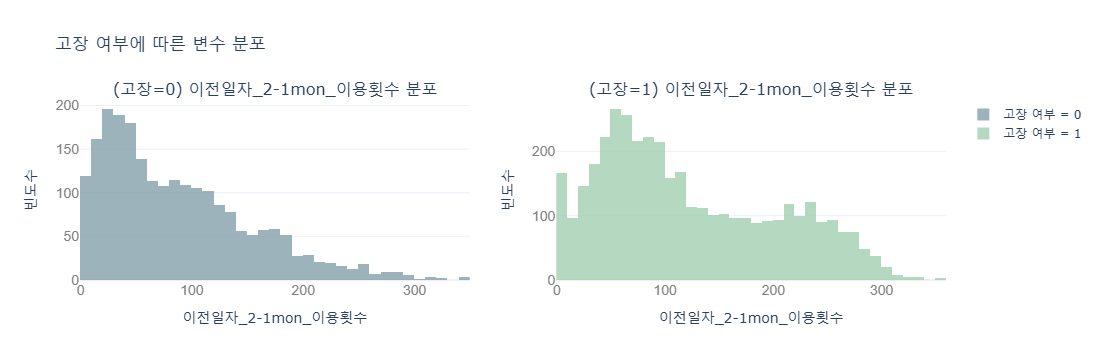

In [63]:
# '이상패턴_10min_횟수'
# '이전일자_2mon_이용횟수'
# '이용횟수_비교'

# '이상패턴_10-5min_횟수'
# '이전일자_2-1mon_이용횟수'

_columns = ['이전일자_2-1mon_이용횟수']
create_bi_subplot2(check_outlier(df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] > 5], '이상패턴_5min_횟수'), _columns)

In [64]:
# 한글 폰트 설정 (Windows에서는 'Malgun Gothic' 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

_columns = ['이상패턴_비율']
create_bi_subplot(check_outlier(df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] > 5], '이상패턴_5min_횟수'), _columns)
create_bi_subplot(df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] > 5], _columns)
# create_bi_subplot(df_Bike_latest_2, _columns)

NameError: name 'create_bi_subplot' is not defined

---
## 이상패턴_5min_횟수(고장=1, 고장=0) 시각화

In [ ]:
_columns = ['이상패턴_5min_횟수']
create_bi_subplot(check_outlier(df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] > 5], '이상패턴_5min_횟수'), _columns)
create_bi_subplot(df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] > 5], _columns)
# create_bi_subplot(df_Bike_latest_2, _columns)

---
## 이전일자_1mon_이용거리(고장=1, 고장=0) 시각화

In [ ]:
_columns = ['이전일자_1mon_이용거리']
create_bi_subplot(check_outlier(df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] > 5], '이상패턴_5min_횟수'), _columns)
# create_bi_subplot(df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] > 5], _columns)
create_bi_subplot(df_Bike_latest_2, _columns)

---
## 이전일자_1mon_이용시간(고장=1, 고장=0)  시각화

In [ ]:
_columns = ['이전일자_1mon_이용시간']
# create_bi_subplot(check_outlier(df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] > 5], '이상패턴_5min_횟수'), _columns)
# create_bi_subplot(df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] > 5], _columns)
create_bi_subplot(df_Bike_latest_2, _columns)

---
## 이전일자_1mon_이용횟수(고장=1, 고장=0) 시각화

In [ ]:
_columns = ['이전일자_1mon_이용횟수']
# create_bi_subplot(check_outlier(df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] > 5], '이상패턴_5min_횟수'), _columns)
# create_bi_subplot(df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] > 5], _columns)
create_bi_subplot(df_Bike_latest_2, _columns)

---
## 이용횟수_비교(고장=1, 고장=0) 시각화

In [ ]:
_columns = ['이용횟수_비교']
create_bi_subplot(check_outlier(df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] > 5], '이상패턴_5min_횟수'), _columns)
create_bi_subplot(df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] > 5], _columns)
#create_bi_subplot(df_Bike_latest_2, _columns)

---
## 이용거리_비교(고장=1, 고장=0) 시각화

In [ ]:
_columns = ['이용거리_비교']
create_bi_subplot(check_outlier(df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] > 5], '이상패턴_5min_횟수'), _columns)
create_bi_subplot(df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] > 5], _columns)
# create_bi_subplot(df_Bike_latest_2, _columns)

In [109]:
df_Bike_latest_2['이상패턴_5min_횟수'].value_counts().sort_index()[:10]

이상패턴_5min_횟수
0    2298
1    3789
2    4164
3    3762
4    2985
5    2308
6    1617
7    1155
8     814
9     620
Name: count, dtype: int64

In [111]:
# 고장횟수에 따른 고장여부 비율 계산
cond3 = df_Bike_latest_2['이상패턴_비율'] > 0
df_2 = df_Bike_latest_2[cond3].groupby('이상패턴_5min_횟수')['고장여부'].value_counts(normalize=True).unstack().reset_index()
df_2.columns = ['이상패턴_5min_횟수', '정상(%)', '고장(%)']

result_df_1 = df_2
# 결과 출력
result_df_1.head(10)

,이상패턴_5min_횟수,정상(%),고장(%)
0,1,0.575614,0.424386
1,2,0.586695,0.413305
2,3,0.555290,0.444710
3,4,0.538358,0.461642
4,5,0.504333,0.495667
5,6,0.482375,0.517625
6,7,0.417316,0.582684
7,8,0.377150,0.622850
8,9,0.354839,0.645161
9,10,0.327801,0.672199


In [113]:
# 고장횟수에 따른 고장여부 비율 계산
df_2 = df_Bike_latest_2.groupby('이상패턴_5min_횟수')['고장여부'].value_counts().unstack().reset_index()
df_2.columns = ['이상패턴_5min_횟수', '정상', '고장']

# '이상패턴_5min_횟수'의 각각의 개수 계산
df_counts = df_Bike_latest_2['이상패턴_5min_횟수'].value_counts().reset_index()
df_counts.columns = ['이상패턴_5min_횟수', '전체횟수']

# df_2와 df_counts를 병합
result_df_2 = pd.merge(df_2, df_counts, on='이상패턴_5min_횟수', how='left').sort_values(by = '이상패턴_5min_횟수', ascending = True).head(20)

result_df_2['정상'] = result_df_2['정상'].astype(int)
result_df_2['고장'] = result_df_2['고장'].astype(int)

# 결과 출력
result_df_2.head(20)

,이상패턴_5min_횟수,정상,고장,전체횟수
0,0,1328,970,2298
1,1,2181,1608,3789
2,2,2443,1721,4164
3,3,2089,1673,3762
4,4,1607,1378,2985
5,5,1164,1144,2308
6,6,780,837,1617
7,7,482,673,1155
8,8,307,507,814
9,9,220,400,620


In [115]:
pd.concat([result_df_1, result_df_2], axis = 1).head(5)

,이상패턴_5min_횟수,정상(%),고장(%),이상패턴_5min_횟수,정상,고장,전체횟수
0,1,0.575614,0.424386,0.0,1328.0,970.0,2298.0
1,2,0.586695,0.413305,1.0,2181.0,1608.0,3789.0
2,3,0.555290,0.444710,2.0,2443.0,1721.0,4164.0
3,4,0.538358,0.461642,3.0,2089.0,1673.0,3762.0
4,5,0.504333,0.495667,4.0,1607.0,1378.0,2985.0


In [117]:
result_df_1.head(20)

,이상패턴_5min_횟수,정상(%),고장(%)
0,1,0.575614,0.424386
1,2,0.586695,0.413305
2,3,0.555290,0.444710
3,4,0.538358,0.461642
4,5,0.504333,0.495667
5,6,0.482375,0.517625
6,7,0.417316,0.582684
7,8,0.377150,0.622850
8,9,0.354839,0.645161
9,10,0.327801,0.672199


---
## 이상패턴 5분 횟수에 따른 정상 및 고장 비율

In [ ]:
result_df_1 = result_df_1.head(20)

In [ ]:
import plotly.graph_objects as go

# 색상 그라데이션 생성
colors = px.colors.sequential.Aggrnyl

# Plotly로 선형 그래프 그리기
fig = go.Figure()

# 정상(%) 선 추가
fig.add_trace(go.Scatter(x=result_df_1['이상패턴_5min_횟수'], 
                         y=result_df_1['정상(%)'], 
                         mode='lines+markers', 
                         name='정상(%)', 
                         line=dict(color='#7c9aa4', width=2), 
                         marker=dict(size=8)))

# 고장(%) 선 추가
fig.add_trace(go.Scatter(x=result_df_1['이상패턴_5min_횟수'], 
                         y=result_df_1['고장(%)'], 
                         mode='lines+markers', 
                         name='고장(%)', 
                         line=dict(color='#9dccab', width=2), 
                         marker=dict(size=8)))

# 레이아웃 설정
fig.update_layout(title='이상패턴_5min_횟수에 따른 정상 및 고장 비율', 
                  xaxis_title='이상패턴_5min_횟수', 
                  yaxis_title='비율(%)', 
                  xaxis=dict(tickmode='linear'), 
                  template='plotly_white',)    # plotly_dark / plotly_white

# X축과 Y축 눈금 글씨 크기 조정
fig.update_xaxes(tickfont=dict(size=10))  # X축 눈금 글씨 크기 설정
fig.update_yaxes(tickfont=dict(size=10))  # Y축 눈금 글씨 크기 설정

# X축과 Y축 눈금 글씨 크기 조정
fig.update_xaxes(tickfont=dict(size=14, family='Arial', color='gray'))  # X축 눈금 글씨 크기 설정
fig.update_yaxes(tickfont=dict(size=14, family='Arial', color='gray'))  # Y축 눈금 글씨 크기 설정

# 그래프 출력
fig.show()

---
### 시각화 - 이상패턴 <-> 고장여부

In [ ]:
# 결과 시각화 데이터 생성
result = df_Bike_latest_2.groupby('이상패턴_5min_횟수')['고장여부'].value_counts().unstack().fillna(0)

# Plotly로 막대 그래프 그리기 (Stacked Bar)
fig = go.Figure()

# 고장 없음(0) 데이터 추가
fig.add_trace(go.Bar(
    x=result.index,
    y=result[0],
    name='정상',
    marker_color='#7c9aa4'
))

# 고장 있음(1) 데이터 추가
fig.add_trace(go.Bar(
    x=result.index,
    y=result[1],
    name='고장',
    marker_color='#9dccab'
))

# 레이아웃 설정
fig.update_layout(
    title='"이상패턴_5min_횟수" 에 따른 고장여부 횟수',
    xaxis_title='이상패턴_5min_횟수',
    yaxis_title='횟수',
    barmode='stack',  # 막대를 쌓아서 표시
    template='plotly_white',  # 흰색 배경 템플릿
    legend_title_text='고장여부'
)

# X축과 Y축 눈금 글씨 크기 조정
fig.update_xaxes(tickfont=dict(size=10))  # X축 눈금 글씨 크기 설정
fig.update_yaxes(tickfont=dict(size=10))  # Y축 눈금 글씨 크기 설정

# X축 눈금 설정: X축을 5단위로 표시
fig.update_xaxes(tickmode='linear', dtick=5)   # X축을 매번 5 단위로 표시

# 그래프 출력
fig.show()

In [ ]:
# 고장 여부 비율 계산
result = df_Bike_latest_2.groupby('이상패턴_5min_횟수')['고장여부'].value_counts(normalize=True).unstack().fillna(0)

# Plotly로 막대 그래프 그리기 (Stacked Bar)
fig = go.Figure()

# 고장 없음(0) 데이터 추가
fig.add_trace(go.Bar(
    x=result.index,
    y=result[0],  # 고장 없음 비율
    name='정상',
    marker_color='#7c9aa4'
))

# 고장 있음(1) 데이터 추가
fig.add_trace(go.Bar(
    x=result.index,
    y=result[1],  # 고장 있음 비율
    name='고장',
    marker_color='#9dccab'
))

# 레이아웃 설정
fig.update_layout(
    title='"이상패턴_5min_횟수" 에 따른 고장여부 비율',
    xaxis_title='이상패턴_10min_횟수',
    yaxis_title='비율',
    barmode='stack',  # 막대를 쌓아서 표시
    template='plotly_white',  # 흰색 배경 템플릿
    legend_title_text='고장여부'
)

# X축과 Y축 눈금 글씨 크기 조정
fig.update_xaxes(tickfont=dict(size=10, family='Arial', color='gray'))   # X축 눈금 글씨 크기 설정
fig.update_yaxes(tickfont=dict(size=10, family='Arial', color='gray'))   # Y축 눈금 글씨 크기 설정

# X축 눈금 설정: X축을 5단위로 표시
fig.update_xaxes(tickmode='linear', dtick=5)   # X축을 매번 5 단위로 표시

# 그래프 출력
fig.show()

In [121]:
df_Bike_latest_2.head(2)

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장구분,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수,대여일자_count(mean),이용거리(M)_mean(mean),이용거리(M)_sum(mean),이용횟수_비교,이용거리_비교,이용횟수_비교(절대값),이용거리_비교(절대값),이상패턴_비율,이용횟수_비교(이진),이상패턴_7-5min_횟수,이상패턴_10-5min_횟수,이상패턴_10-7min_횟수,이전일자_3-1mon_이용횟수,이전일자_3-2mon_이용횟수,이전일자_2-1mon_이용횟수
28418,SPB-30001,2024-05-28,2024-04-28,2024-03-28,2024-06-28,,0,5,5,5,240874.96,2496.0,161.0,452068.57,4878.0,302.0,572952.52,5969.0,396.0,128.333333,1921.620334,249061.637083,25.45,-3.29,25.45,3.29,3.10559,0,0,0,0,235.0,94.0,141.0
28419,SPB-30008,2024-04-20,2024-03-20,2024-02-20,2024-05-20,,0,0,0,0,228641.47,1732.0,87.0,553440.37,4827.0,200.0,669926.15,5720.0,262.0,96.916667,1931.073659,194204.596250,-10.23,17.73,10.23,17.73,0.00000,1,0,0,0,175.0,62.0,113.0


In [123]:
df_Bike_latest_3 = pd.get_dummies(df_Bike_latest_2, columns=['고장구분'])

In [125]:
df_Bike_latest_3.head(3)

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수,대여일자_count(mean),이용거리(M)_mean(mean),이용거리(M)_sum(mean),이용횟수_비교,이용거리_비교,이용횟수_비교(절대값),이용거리_비교(절대값),이상패턴_비율,이용횟수_비교(이진),이상패턴_7-5min_횟수,이상패턴_10-5min_횟수,이상패턴_10-7min_횟수,이전일자_3-1mon_이용횟수,이전일자_3-2mon_이용횟수,이전일자_2-1mon_이용횟수,고장구분_,고장구분_기타,고장구분_단말기,고장구분_안장,고장구분_체인,고장구분_타이어,고장구분_페달
28418,SPB-30001,2024-05-28,2024-04-28,2024-03-28,2024-06-28,0,5,5,5,240874.96,2496.0,161.0,452068.57,4878.0,302.0,572952.52,5969.0,396.0,128.333333,1921.620334,249061.637083,25.45,-3.29,25.45,3.29,3.105590,0,0,0,0,235.0,94.0,141.0,True,False,False,False,False,False,False
28419,SPB-30008,2024-04-20,2024-03-20,2024-02-20,2024-05-20,0,0,0,0,228641.47,1732.0,87.0,553440.37,4827.0,200.0,669926.15,5720.0,262.0,96.916667,1931.073659,194204.596250,-10.23,17.73,10.23,17.73,0.000000,1,0,0,0,175.0,62.0,113.0,True,False,False,False,False,False,False
28420,SPB-30032,2024-05-30,2024-04-30,2024-03-30,2024-06-30,0,3,3,3,66916.90,1216.0,65.0,72061.61,1283.0,70.0,81573.03,1405.0,80.0,113.272727,1019.159751,121656.539545,-42.62,-45.00,42.62,45.00,4.615385,1,0,0,0,15.0,10.0,5.0,True,False,False,False,False,False,False


In [127]:
df_Bike_latest_3.columns

Index(['자전거번호', '이전일자_1mon', '이전일자_2mon', '이전일자_3mon', '등록대여일자', '고장여부',
       '이상패턴_5min_횟수', '이상패턴_7min_횟수', '이상패턴_10min_횟수', '이전일자_1mon_이용거리',
       '이전일자_1mon_이용시간', '이전일자_1mon_이용횟수', '이전일자_2mon_이용거리', '이전일자_2mon_이용시간',
       '이전일자_2mon_이용횟수', '이전일자_3mon_이용거리', '이전일자_3mon_이용시간', '이전일자_3mon_이용횟수',
       '대여일자_count(mean)', '이용거리(M)_mean(mean)', '이용거리(M)_sum(mean)',
       '이용횟수_비교', '이용거리_비교', '이용횟수_비교(절대값)', '이용거리_비교(절대값)', '이상패턴_비율',
       '이용횟수_비교(이진)', '이상패턴_7-5min_횟수', '이상패턴_10-5min_횟수', '이상패턴_10-7min_횟수',
       '이전일자_3-1mon_이용횟수', '이전일자_3-2mon_이용횟수', '이전일자_2-1mon_이용횟수', '고장구분_',
       '고장구분_기타 ', '고장구분_단말기', '고장구분_안장', '고장구분_체인', '고장구분_타이어 ', '고장구분_페달'],
      dtype='object')

In [129]:
cond1 = df_Bike_latest_3['이상패턴_5min_횟수'] > 5

df_Bike_latest_3[cond1][['고장여부',
       '이상패턴_5min_횟수', '이상패턴_7min_횟수', '이상패턴_10min_횟수', '이전일자_1mon_이용거리',
       '이전일자_1mon_이용시간', '이전일자_1mon_이용횟수', '이전일자_2mon_이용거리', '이전일자_2mon_이용시간',
       '이전일자_2mon_이용횟수', '이전일자_3mon_이용거리', '이전일자_3mon_이용시간', '이전일자_3mon_이용횟수',
       '대여일자_count(mean)', '이용거리(M)_mean(mean)', '이용거리(M)_sum(mean)',
       '이용횟수_비교', '이용거리_비교', '이용횟수_비교(절대값)', '이용거리_비교(절대값)', '이상패턴_비율',
       '이용횟수_비교(이진)', '이상패턴_7-5min_횟수', '이상패턴_10-5min_횟수', '이상패턴_10-7min_횟수',
       '이전일자_3-1mon_이용횟수', '이전일자_3-2mon_이용횟수', '이전일자_2-1mon_이용횟수', '고장구분_',
       '고장구분_기타 ', '고장구분_단말기', '고장구분_안장', '고장구분_체인', '고장구분_타이어 ', '고장구분_페달']].corr()

,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수,대여일자_count(mean),이용거리(M)_mean(mean),이용거리(M)_sum(mean),이용횟수_비교,이용거리_비교,이용횟수_비교(절대값),이용거리_비교(절대값),이상패턴_비율,이용횟수_비교(이진),이상패턴_7-5min_횟수,이상패턴_10-5min_횟수,이상패턴_10-7min_횟수,이전일자_3-1mon_이용횟수,이전일자_3-2mon_이용횟수,이전일자_2-1mon_이용횟수,고장구분_,고장구분_기타,고장구분_단말기,고장구분_안장,고장구분_체인,고장구분_타이어,고장구분_페달
고장여부,1.000000,0.219770,0.221525,0.223101,0.221608,0.228914,0.233798,0.232376,0.243231,0.250303,0.208865,0.222733,0.237070,0.208129,0.124004,0.167266,-0.038877,-0.010346,-0.024112,0.001950,-0.022362,0.119315,0.050599,0.061586,0.041474,0.219577,0.171451,0.237565,-1.000000,0.261965,0.115552,0.325483,0.340932,0.256976,0.145317
이상패턴_5min_횟수,0.219770,1.000000,0.997986,0.994342,0.170731,0.177150,0.267108,0.198881,0.208608,0.270317,0.202863,0.214077,0.265976,0.175185,0.075607,0.157628,0.024783,0.008794,0.018646,0.008076,0.396720,-0.068733,0.073065,0.084992,0.054729,0.243521,0.213989,0.240889,-0.219770,0.002414,0.072501,0.081014,0.161994,-0.019521,0.017739
이상패턴_7min_횟수,0.221525,0.997986,1.000000,0.996697,0.182791,0.189198,0.278804,0.210875,0.220501,0.281890,0.214639,0.225747,0.277310,0.181799,0.081523,0.164584,0.028055,0.012449,0.021420,0.011242,0.386919,-0.073865,0.136178,0.125694,0.059131,0.253715,0.222997,0.250924,-0.221525,0.001488,0.071274,0.079666,0.166457,-0.019435,0.018058
이상패턴_10min_횟수,0.223101,0.994342,0.996697,1.000000,0.204526,0.210582,0.300509,0.230979,0.240332,0.301599,0.234444,0.245200,0.296414,0.192596,0.092707,0.176090,0.033584,0.018328,0.026102,0.016360,0.369303,-0.082715,0.141169,0.190357,0.140004,0.269722,0.237761,0.266097,-0.223101,0.002209,0.069892,0.078325,0.171807,-0.022418,0.018580
이전일자_1mon_이용거리,0.221608,0.170731,0.182791,0.204526,1.000000,0.982653,0.962140,0.949253,0.936823,0.918409,0.917199,0.905742,0.884190,0.519239,0.420493,0.530040,0.206086,0.254584,0.170344,0.222366,-0.563127,-0.369011,0.207504,0.340552,0.285402,0.765875,0.670615,0.759850,-0.221608,0.048133,0.008884,-0.077237,0.337390,-0.070027,0.037009
이전일자_1mon_이용시간,0.228914,0.177150,0.189198,0.210582,0.982653,1.000000,0.966286,0.936634,0.947452,0.921677,0.906605,0.914385,0.887768,0.511023,0.386720,0.515185,0.214353,0.256786,0.178101,0.224710,-0.563260,-0.376231,0.207994,0.338032,0.281720,0.768826,0.674255,0.761778,-0.228914,0.048462,0.010854,-0.073709,0.341412,-0.068662,0.035361
이전일자_1mon_이용횟수,0.233798,0.267108,0.278804,0.300509,0.962140,0.966286,1.000000,0.924162,0.928454,0.945400,0.901149,0.904598,0.911425,0.549471,0.393442,0.548747,0.206947,0.233165,0.167657,0.200616,-0.557583,-0.395061,0.211877,0.350161,0.294604,0.784626,0.693948,0.771904,-0.233798,0.053237,0.011003,-0.064827,0.332480,-0.069666,0.041291
이전일자_2mon_이용거리,0.232376,0.198881,0.210875,0.230979,0.949253,0.936634,0.924162,1.000000,0.988405,0.973639,0.977386,0.966725,0.948059,0.540850,0.430475,0.551496,0.180594,0.224438,0.149119,0.195629,-0.522343,-0.324654,0.209428,0.328520,0.268142,0.884465,0.741939,0.908305,-0.232376,0.041141,0.004170,-0.077505,0.352383,-0.068638,0.046641
이전일자_2mon_이용시간,0.243231,0.208608,0.220501,0.240332,0.936823,0.947452,0.928454,0.988405,1.000000,0.978750,0.967373,0.976312,0.953265,0.533651,0.397060,0.537242,0.187328,0.226841,0.155533,0.198182,-0.520190,-0.329420,0.208842,0.326352,0.265755,0.889783,0.746498,0.913673,-0.243231,0.042766,0.008091,-0.071906,0.357027,-0.067581,0.045049
이전일자_2mon_이용횟수,0.250303,0.270317,0.281890,0.301599,0.918409,0.921677,0.945400,0.973639,0.978750,1.000000,0.959236,0.964005,0.975073,0.572940,0.405263,0.571182,0.172547,0.202918,0.139547,0.174484,-0.515706,-0.332272,0.210287,0.330735,0.270379,0.912666,0.765927,0.936954,-0.250303,0.049931,0.013632,-0.065648,0.348434,-0.067342,0.050270


In [137]:
df_Bike_latest_4 = df_Bike_latest_3[df_Bike_latest_3['이상패턴_5min_횟수'] > 5]
df_Bike_latest_4.head(2)

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수,대여일자_count(mean),이용거리(M)_mean(mean),이용거리(M)_sum(mean),이용횟수_비교,이용거리_비교,이용횟수_비교(절대값),이용거리_비교(절대값),이상패턴_비율,이용횟수_비교(이진),이상패턴_7-5min_횟수,이상패턴_10-5min_횟수,이상패턴_10-7min_횟수,이전일자_3-1mon_이용횟수,이전일자_3-2mon_이용횟수,이전일자_2-1mon_이용횟수,고장구분_,고장구분_기타,고장구분_단말기,고장구분_안장,고장구분_체인,고장구분_타이어,고장구분_페달
28437,SPB-30113,2024-05-30,2024-04-30,2024-03-30,2024-06-30,0,6,6,7,501725.48,3757.0,196.0,952090.56,7296.0,376.0,1400630.42,10824.0,525.0,123.909091,1843.184634,228984.407727,58.18,119.11,58.18,119.11,3.061224,0,0,1,1,329.0,149.0,180.0,True,False,False,False,False,False,False
28443,SPB-30138,2024-05-29,2024-04-29,2024-03-29,2024-06-29,0,6,6,6,329287.07,2602.0,136.0,689407.68,6240.0,298.0,895731.23,8040.0,383.0,101.909091,1777.683606,174640.492727,33.45,88.55,33.45,88.55,4.411765,0,0,0,0,247.0,85.0,162.0,True,False,False,False,False,False,False


In [139]:
df_Bike_latest_3[df_Bike_latest_3['고장여부'] == 0].head(2)

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수,대여일자_count(mean),이용거리(M)_mean(mean),이용거리(M)_sum(mean),이용횟수_비교,이용거리_비교,이용횟수_비교(절대값),이용거리_비교(절대값),이상패턴_비율,이용횟수_비교(이진),이상패턴_7-5min_횟수,이상패턴_10-5min_횟수,이상패턴_10-7min_횟수,이전일자_3-1mon_이용횟수,이전일자_3-2mon_이용횟수,이전일자_2-1mon_이용횟수,고장구분_,고장구분_기타,고장구분_단말기,고장구분_안장,고장구분_체인,고장구분_타이어,고장구분_페달
28418,SPB-30001,2024-05-28,2024-04-28,2024-03-28,2024-06-28,0,5,5,5,240874.96,2496.0,161.0,452068.57,4878.0,302.0,572952.52,5969.0,396.0,128.333333,1921.620334,249061.637083,25.45,-3.29,25.45,3.29,3.10559,0,0,0,0,235.0,94.0,141.0,True,False,False,False,False,False,False
28419,SPB-30008,2024-04-20,2024-03-20,2024-02-20,2024-05-20,0,0,0,0,228641.47,1732.0,87.0,553440.37,4827.0,200.0,669926.15,5720.0,262.0,96.916667,1931.073659,194204.596250,-10.23,17.73,10.23,17.73,0.00000,1,0,0,0,175.0,62.0,113.0,True,False,False,False,False,False,False


In [141]:
df_Bike_latest_3[df_Bike_latest_3['고장여부'] == 1].head(2)

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수,대여일자_count(mean),이용거리(M)_mean(mean),이용거리(M)_sum(mean),이용횟수_비교,이용거리_비교,이용횟수_비교(절대값),이용거리_비교(절대값),이상패턴_비율,이용횟수_비교(이진),이상패턴_7-5min_횟수,이상패턴_10-5min_횟수,이상패턴_10-7min_횟수,이전일자_3-1mon_이용횟수,이전일자_3-2mon_이용횟수,이전일자_2-1mon_이용횟수,고장구분_,고장구분_기타,고장구분_단말기,고장구분_안장,고장구분_체인,고장구분_타이어,고장구분_페달
0,SPB-30006,2024-02-29,2024-01-31,2023-12-31,2024-03-31,1,2,2,2,98170.92,843.0,74.0,168996.89,1623.0,128.0,223726.14,2395.0,171.0,128.50,1690.160256,225762.004167,-42.41,-56.52,42.41,56.52,2.702703,1,0,0,0,97.0,43.0,54.0,False,False,False,False,False,False,True
1,SPB-30010,2024-05-18,2024-04-18,2024-03-18,2024-06-18,1,5,5,5,231653.56,2257.0,121.0,401421.89,3921.0,207.0,586710.32,5621.0,304.0,126.75,1577.821455,207201.873333,-4.54,11.80,4.54,11.80,4.132231,1,0,0,0,183.0,97.0,86.0,False,False,False,False,False,True,False


In [143]:
df_Bike_latest_3.head(2)

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수,대여일자_count(mean),이용거리(M)_mean(mean),이용거리(M)_sum(mean),이용횟수_비교,이용거리_비교,이용횟수_비교(절대값),이용거리_비교(절대값),이상패턴_비율,이용횟수_비교(이진),이상패턴_7-5min_횟수,이상패턴_10-5min_횟수,이상패턴_10-7min_횟수,이전일자_3-1mon_이용횟수,이전일자_3-2mon_이용횟수,이전일자_2-1mon_이용횟수,고장구분_,고장구분_기타,고장구분_단말기,고장구분_안장,고장구분_체인,고장구분_타이어,고장구분_페달
28418,SPB-30001,2024-05-28,2024-04-28,2024-03-28,2024-06-28,0,5,5,5,240874.96,2496.0,161.0,452068.57,4878.0,302.0,572952.52,5969.0,396.0,128.333333,1921.620334,249061.637083,25.45,-3.29,25.45,3.29,3.10559,0,0,0,0,235.0,94.0,141.0,True,False,False,False,False,False,False
28419,SPB-30008,2024-04-20,2024-03-20,2024-02-20,2024-05-20,0,0,0,0,228641.47,1732.0,87.0,553440.37,4827.0,200.0,669926.15,5720.0,262.0,96.916667,1931.073659,194204.596250,-10.23,17.73,10.23,17.73,0.00000,1,0,0,0,175.0,62.0,113.0,True,False,False,False,False,False,False


In [145]:
import plotly.express as px
print(px.colors.named_colorscales())

['aggrnyl', 'agsunset', 'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'darkmint', 'electric', 'emrld', 'gnbu', 'greens', 'greys', 'hot', 'inferno', 'jet', 'magenta', 'magma', 'mint', 'orrd', 'oranges', 'oryel', 'peach', 'pinkyl', 'plasma', 'plotly3', 'pubu', 'pubugn', 'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu', 'rdpu', 'redor', 'reds', 'sunset', 'sunsetdark', 'teal', 'tealgrn', 'turbo', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr', 'ylorrd', 'algae', 'amp', 'deep', 'dense', 'gray', 'haline', 'ice', 'matter', 'solar', 'speed', 'tempo', 'thermal', 'turbid', 'armyrose', 'brbg', 'earth', 'fall', 'geyser', 'prgn', 'piyg', 'picnic', 'portland', 'puor', 'rdgy', 'rdylbu', 'rdylgn', 'spectral', 'tealrose', 'temps', 'tropic', 'balance', 'curl', 'delta', 'oxy', 'edge', 'hsv', 'icefire', 'phase', 'twilight', 'mrybm', 'mygbm']


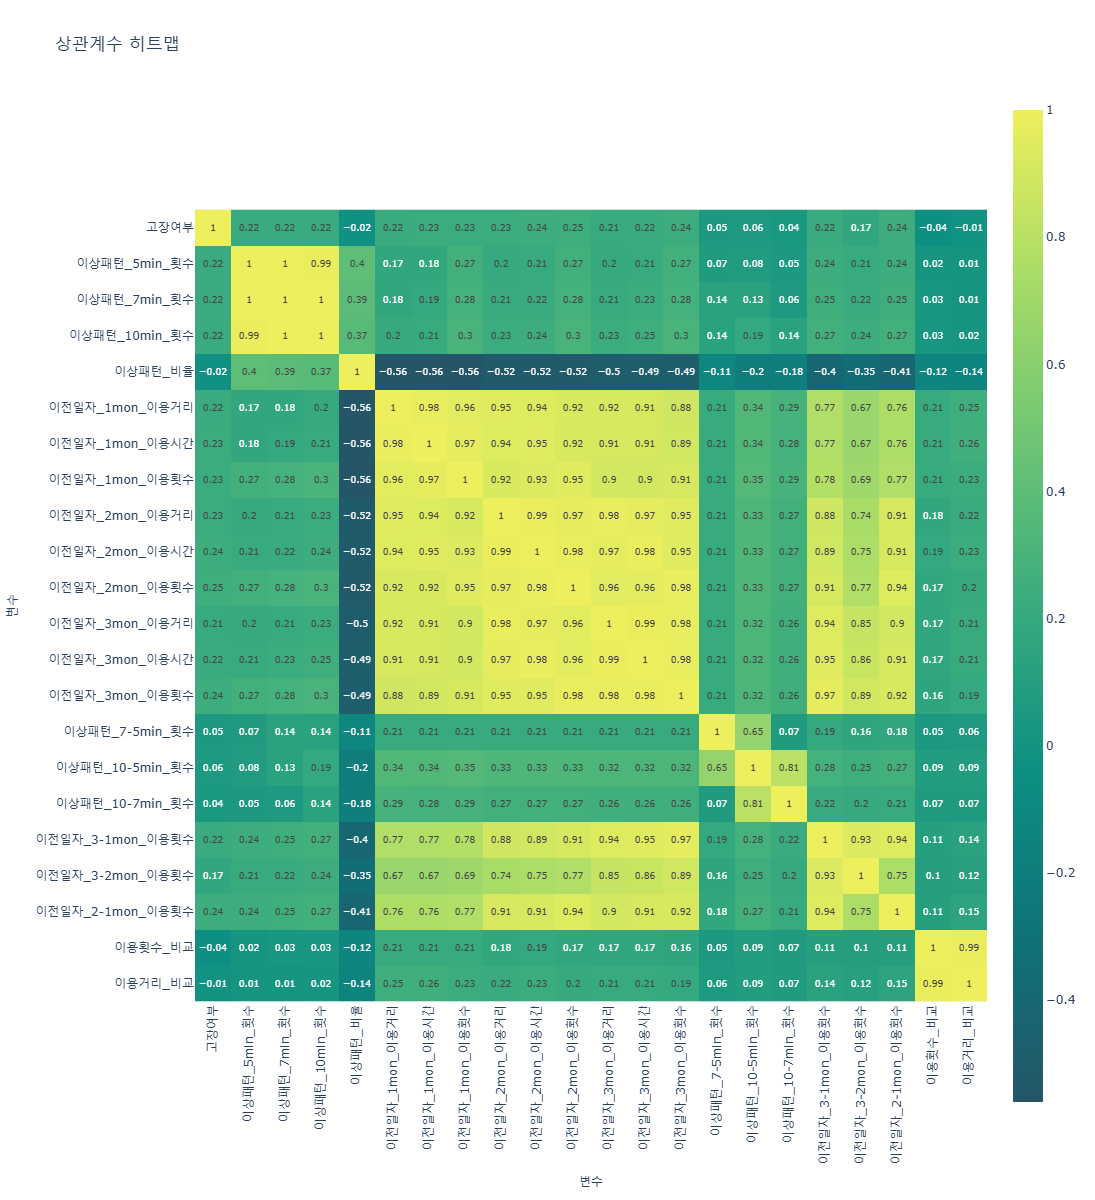

In [330]:
import plotly.express as px

cond1 = df_Bike_latest_3['이상패턴_5min_횟수'] > 5
df_Bike_latest_4 = df_Bike_latest_3[cond1]
df_Bike_latest_5 = df_Bike_latest_4[['고장여부',
       '이상패턴_5min_횟수', '이상패턴_7min_횟수', '이상패턴_10min_횟수', '이상패턴_비율',
       '이전일자_1mon_이용거리', '이전일자_1mon_이용시간', '이전일자_1mon_이용횟수',
       '이전일자_2mon_이용거리', '이전일자_2mon_이용시간', '이전일자_2mon_이용횟수',
       '이전일자_3mon_이용거리', '이전일자_3mon_이용시간', '이전일자_3mon_이용횟수',
       '이상패턴_7-5min_횟수', '이상패턴_10-5min_횟수', '이상패턴_10-7min_횟수',
       '이전일자_3-1mon_이용횟수', '이전일자_3-2mon_이용횟수', '이전일자_2-1mon_이용횟수',
       '이용횟수_비교', '이용거리_비교',
       #'이용횟수_비교(이진)', '이용횟수_비교(절대값)', '이용거리_비교(절대값)'
       ]].corr().round(2)

# Plotly로 히트맵 생성
fig = px.imshow(df_Bike_latest_5,
                text_auto=True,   # 각 셀에 텍스트 자동 표시
                color_continuous_scale='aggrnyl',  # 색상 스케일
                title='상관계수 히트맵')

# 레이아웃 설정
fig.update_layout(
    xaxis_title='변수',
    yaxis_title='변수',
    width=1200,
    height=1200
)

# X축과 Y축 폰트 크기 조절
fig.update_xaxes(title_font=dict(size=12), tickfont=dict(size=12), tickangle=-90)   # X축 제목 및 눈금 폰트 크기 설정
fig.update_yaxes(title_font=dict(size=12), tickfont=dict(size=12))   # Y축 제목 및 눈금 폰트 크기 설정

# 상관계수 표시된 글씨 크기 조절
fig.update_traces(textfont=dict(size=9))   # 각 셀에 표시된 상관계수 텍스트 크기 설정
# 그래프 출력
fig.show()

---
### 조건 별 정확도 테스트

In [ ]:
%pip install scikit-learn

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, log_loss

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

_columns = [
    # ['이상패턴_5min_횟수'],
    # ['이상패턴_5min_횟수', '이용횟수_비교'],
    # ['이상패턴_5min_횟수', '이용횟수_비교', '이상패턴_비율'],
    # ['이상패턴_5min_횟수', '이용횟수_비교', '이용거리_비교'],
    # ['이상패턴_5min_횟수', '이상패턴_비율', '이전일자_1mon_이용횟수', '이용횟수_비교'],
    # ['이상패턴_5min_횟수', '이전일자_1mon_이용횟수', '이용횟수_비교', '이상패턴_비율'],
    # ['이상패턴_5min_횟수', '이전일자_1mon_이용횟수', '이용횟수_비교', '이용거리_비교'],
    # ['이상패턴_10min_횟수', '이전일자_1mon_이용횟수'],

    ['이상패턴_10min_횟수',
       #'이상패턴_비율',
       '이전일자_2mon_이용횟수',
       #'이상패턴_10-5min_횟수',
       # '이전일자_2-1mon_이용횟수',
       '이용횟수_비교', 
       #'이용거리_비교',
       ],

    # ['이상패턴_5min_횟수', '이상패턴_7min_횟수', '이상패턴_10min_횟수', '이상패턴_비율',
    #    '이전일자_1mon_이용거리', '이전일자_1mon_이용시간', '이전일자_1mon_이용횟수',
    #    '이전일자_2mon_이용거리', '이전일자_2mon_이용시간', '이전일자_2mon_이용횟수',
    #    '이전일자_3mon_이용거리', '이전일자_3mon_이용시간', '이전일자_3mon_이용횟수',
    #    '이상패턴_7-5min_횟수', '이상패턴_10-5min_횟수', '이상패턴_10-7min_횟수',
    #    '이전일자_3-1mon_이용횟수', '이전일자_3-2mon_이용횟수', '이전일자_2-1mon_이용횟수',
    #    '이용횟수_비교', '이용거리_비교',]
    
    #['이상패턴_5min_횟수', '이전일자_1mon_이용횟수', '이상패턴_비율', '이용횟수_비교(이진)'],
]
for idx in range(5, 10):
    outliers_3 = df_Bike_latest_4[df_Bike_latest_4['이상패턴_5min_횟수'] > idx]

    for _column in _columns:
        X = np.array(outliers_3[_column]).reshape(-1, len(_column))
        y = np.array(outliers_3['고장여부'])

        # 데이터셋을 학습 세트와 테스트 세트로 분리
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=444, stratify=y)
        print(X_train.shape[0], X_test.shape[0], y_train.shape[0], y_test.shape[0])

        # 로지스틱 회귀 모델 생성 및 학습
        model = LogisticRegression()
        model.fit(X_train, y_train)

        # 테스트 세트에 대한 예측
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        # 모델 평가
        print('======================================')
        print(f'[이상패턴_5min_횟수] : {str(idx)}, [_columns] : {_column}')
        print('테스트 세트 정확도 : ', model.score(X_test, y_test))
        print('classification_report : \n', classification_report(y_test, y_pred))
        print('confusion_matrix : \n', confusion_matrix(y_test, y_pred))
        print(f'Accuracy :  {accuracy_score(y_test, y_pred)}, F1 Score : {f1_score(y_test, y_pred)}, Log Loss : {log_loss(y_test, y_prob)}, Log Loss : {log_loss(y_test, y_prob)}')

In [ ]:
# 혼동 행렬 생성
conf_matrix = [[ 76,853],[110, 356]]

# Plotly로 혼동행렬 시각화
fig = go.Figure(data=go.Heatmap(
    z=conf_matrix,
    x=['예측: 정상', '예측: 고장'],
    y=['실제: 정상', '실제: 고장'],
    
    # colorscale='Blues',  # 색상 스케일 설정
    colorscale=['#7c9aa4', '#9dccab'],  # 색상 스케일 설정
    
    text=conf_matrix,    # 각 셀에 표시할 텍스트 설정
    texttemplate="%{text}",  # 텍스트 포맷 설정 (숫자 그대로 표시)
    hoverinfo='text',  # 마우스를 올렸을 때 텍스트만 표시
    showscale=True     # 색상 바 표시 여부
))

# 레이아웃 설정
fig.update_layout(
    title='혼동 행렬',
    xaxis_title='예측',
    yaxis_title='실제',
    width=500,
    height=500
)

# 그래프 출력
fig.show()

In [ ]:
df_Bike_latest_3.head(2)

In [ ]:
df_Bike_latest_3.columns

In [147]:
df_Bike_latest_4 = df_Bike_latest_3

In [151]:
df_Bike_latest_4.head(2)

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수,대여일자_count(mean),이용거리(M)_mean(mean),이용거리(M)_sum(mean),이용횟수_비교,이용거리_비교,이용횟수_비교(절대값),이용거리_비교(절대값),이상패턴_비율,이용횟수_비교(이진),이상패턴_7-5min_횟수,이상패턴_10-5min_횟수,이상패턴_10-7min_횟수,이전일자_3-1mon_이용횟수,이전일자_3-2mon_이용횟수,이전일자_2-1mon_이용횟수,고장구분_,고장구분_기타,고장구분_단말기,고장구분_안장,고장구분_체인,고장구분_타이어,고장구분_페달
28418,SPB-30001,2024-05-28,2024-04-28,2024-03-28,2024-06-28,0,5,5,5,240874.96,2496.0,161.0,452068.57,4878.0,302.0,572952.52,5969.0,396.0,128.333333,1921.620334,249061.637083,25.45,-3.29,25.45,3.29,3.10559,0,0,0,0,235.0,94.0,141.0,True,False,False,False,False,False,False
28419,SPB-30008,2024-04-20,2024-03-20,2024-02-20,2024-05-20,0,0,0,0,228641.47,1732.0,87.0,553440.37,4827.0,200.0,669926.15,5720.0,262.0,96.916667,1931.073659,194204.596250,-10.23,17.73,10.23,17.73,0.00000,1,0,0,0,175.0,62.0,113.0,True,False,False,False,False,False,False


---
## 로지스틱회귀 모델링

In [ ]:
# outliers_3 = check_outlier(df_Bike_latest_4[df_Bike_latest_4['이상패턴_5min_횟수'] > 0], '이상패턴_5min_횟수')
# outliers_3 = df_Bike_latest_4[df_Bike_latest_4['이상패턴_5min_횟수'] > 1]
#outliers_3 = check_outlier(df_Bike_latest_4[df_Bike_latest_4['이상패턴_5min_횟수'] > 1], '이상패턴_5min_횟수')


# outliers_3 = df_Bike_latest_4[df_Bike_latest_4['이상패턴_5min_횟수'] > 0]
# - 테스트 세트 정확도: 0.7186932849364791
# outliers_3 = df_Bike_latest_4[df_Bike_latest_4['이상패턴_5min_횟수'] > 1]
# - 테스트 세트 정확도: 0.7407467797162889
# outliers_3 = df_Bike_latest_4[df_Bike_latest_4['이상패턴_5min_횟수'] > 2]
# - 테스트 세트 정확도: 0.758641600970285
# outliers_3 = df_Bike_latest_4[df_Bike_latest_4['이상패턴_5min_횟수'] > 3]
# - 테스트 세트 정확도: 0.7893236589790101
# outliers_3 = df_Bike_latest_4[df_Bike_latest_4['이상패턴_5min_횟수'] > 4]
# - 테스트 세트 정확도: 0.8163196776359973
outliers_3 = df_Bike_latest_4[df_Bike_latest_4['이상패턴_5min_횟수'] > 5]
# - 테스트 세트 정확도: 0.8446771378708552

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, log_loss

# 한글 폰트 설정 (Windows에서는 'Malgun Gothic' 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# '이상패턴_5min_횟수', '이전일자_1mon_이용횟수', '이용횟수_비교', '이용거리_비교'
# ============================================================================
# _columns = ['이상패턴_5min_횟수']                                                           # 테스트 세트 정확도: 0.8259162303664922
# _columns = ['이상패턴_5min_횟수', '이용횟수_비교']                                           # 테스트 세트 정확도: 0.8259162303664922
# _columns = ['이상패턴_5min_횟수', '이전일자_1mon_이용횟수']                                  # 테스트 세트 정확도: 0.8259162303664922
# _columns = ['이상패턴_5min_횟수', '이용거리_비교']                                           # 테스트 세트 정확도: 0.8259162303664922
# _columns = ['이용횟수_비교']                                                                # 테스트 세트 정확도: 0.8259162303664922

# _columns = ['이용거리_비교']                                                                # 테스트 세트 정확도: 0.8263525305410122
# _columns = ['이용횟수_비교', '이용거리_비교']                                                # 테스트 세트 정확도: 0.8263525305410122
# _columns = ['이상패턴_5min_횟수', '이용횟수_비교', '이용거리_비교']                           # 테스트 세트 정확도: 0.8294066317626527
# _columns = ['이상패턴_5min_횟수', '이전일자_1mon_이용횟수', '이용거리_비교']                  # 테스트 세트 정확도: 0.8328970331588132
# _columns = ['이상패턴_5min_횟수', '이전일자_1mon_이용횟수', '이용횟수_비교', '이용거리_비교']  # 테스트 세트 정확도: 0.8442408376963351
# _columns = ['이상패턴_5min_횟수', '이전일자_1mon_이용횟수', '이용횟수_비교']                  # 테스트 세트 정확도: 0.8478939157566303
# _columns = ['이상패턴_5min_횟수', '이전일자_1mon_이용횟수', '이용횟수_비교', '이상패턴_비율']  # 테스트 세트 정확도: 0.8478939157566303
# _columns = ['이상패턴_5min_횟수', '이전일자_1mon_이용횟수', '이상패턴_비율', '이용횟수_비교(이진)']  # 테스트 세트 정확도: 0.8478939157566303
_columns = ['이상패턴_5min_횟수', '이용횟수_비교', '이상패턴_비율']                             # 테스트 세트 정확도: 0.8377535101404057
#_columns = ['이상패턴_5min_횟수', '이상패턴_5min_횟수', '이상패턴_5min_횟수', '이용횟수_비교(이진)', '이상패턴_비율']  # 테스트 세트 정확도: 0.8385335413416537

# _columns = ['이상패턴_7min_횟수',
#        '이전일자_2mon_이용횟수',
#        '이상패턴_10-5min_횟수',
#        '이전일자_2-1mon_이용횟수',
#        #'이용횟수_비교', '이용거리_비교',
#        ]

_columns = [
'이상패턴_5min_횟수', '이상패턴_7min_횟수', '이상패턴_10min_횟수', '이상패턴_비율',
       '이전일자_1mon_이용거리', '이전일자_1mon_이용시간', '이전일자_1mon_이용횟수',
       '이전일자_2mon_이용거리', '이전일자_2mon_이용시간', '이전일자_2mon_이용횟수',
       '이전일자_3mon_이용거리', '이전일자_3mon_이용시간', '이전일자_3mon_이용횟수',
       '이상패턴_7-5min_횟수', '이상패턴_10-5min_횟수', '이상패턴_10-7min_횟수',
       '이전일자_3-1mon_이용횟수', '이전일자_3-2mon_이용횟수', '이전일자_2-1mon_이용횟수',
       '이용횟수_비교', '이용거리_비교'
]

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# # 해당 컬럼에만 스케일러 적용
# X = scaler.fit_transform(outliers_3[_columns])

X = np.array(outliers_3[_columns]).reshape(-1, len(_columns))
y = np.array(outliers_3['고장여부'])

# 데이터셋을 학습 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=444, stratify=y)
print(X_train.shape[0], X_test.shape[0], y_train.shape[0], y_test.shape[0])

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# # 결과 시각화
plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 1], y_pred, color='red', label='Predicted')
plt.xlabel('"이상대여패턴"')
plt.ylabel('고장여부')
plt.title('"이상대여패턴" 에 따른 고장여부 예측')
plt.legend()
plt.show()

# 모델 평가
print('테스트 세트 정확도 : ', model.score(X_test, y_test))
print('confusion_matrix : \n', confusion_matrix(y_test, y_pred))
print('classification_report : \n', classification_report(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("F1 Score : ", f1_score(y_test, y_pred))
print("Log Loss : ", log_loss(y_test, y_prob))


In [ ]:
# 회귀 계수 출력
print('회귀 계수:', model.coef_)
print('절편:', model.intercept_)

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### [ 이상패턴 횟수 == 0 ] 것들의 고장여부 비율

In [ ]:
counts = df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] > 5]['고장여부'].value_counts()
total = counts.sum()   # 총 데이터 개수
percentage = counts / total * 100   # 비율 계산
print(f'total : {total}')
print(f'counts : {counts}')
print(f'percentage : {percentage}')

---
## PCA사용하여 모델링

### 필요한 라이브러리 임포트


In [266]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




### 데이터 로드 및 전처리

In [ ]:
# 데이터 로드 (예: 붓꽃 데이터셋)
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [155]:
outliers_3 = df_Bike_latest_4[df_Bike_latest_4['이상패턴_5min_횟수'] > 5]

_columns = [
'이상패턴_5min_횟수', '이상패턴_7min_횟수', '이상패턴_10min_횟수', '이상패턴_비율',
       '이전일자_1mon_이용거리', '이전일자_1mon_이용시간', '이전일자_1mon_이용횟수',
       '이전일자_2mon_이용거리', '이전일자_2mon_이용시간', '이전일자_2mon_이용횟수',
       '이전일자_3mon_이용거리', '이전일자_3mon_이용시간', '이전일자_3mon_이용횟수',
       '이상패턴_7-5min_횟수', '이상패턴_10-5min_횟수', '이상패턴_10-7min_횟수',
       '이전일자_3-1mon_이용횟수', '이전일자_3-2mon_이용횟수', '이전일자_2-1mon_이용횟수',
       '이용횟수_비교', '이용거리_비교'
]

X = np.array(outliers_3[_columns]).reshape(-1, len(_columns))
y = np.array(outliers_3['고장여부'])

# 데이터셋을 학습 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=444, stratify=y)
print(X_train.shape[0], X_test.shape[0], y_train.shape[0], y_test.shape[0])

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

5577 1395 5577 1395


### PCA 수행


In [239]:
# PCA 객체 생성
pca = PCA(n_components=10)

# 훈련 데이터에 PCA 적용
X_train_pca = pca.fit_transform(X_train_scaled)

# 테스트 데이터에 PCA 적용
X_test_pca = pca.transform(X_test_scaled)

# 설명된 분산 비율 출력
print("설명된 분산 비율:", pca.explained_variance_ratio_)

설명된 분산 비율: [0.55905663 0.14982938 0.09191569 0.0856504  0.04407958 0.03369151
 0.01653315 0.01286187 0.00298627 0.00153865]


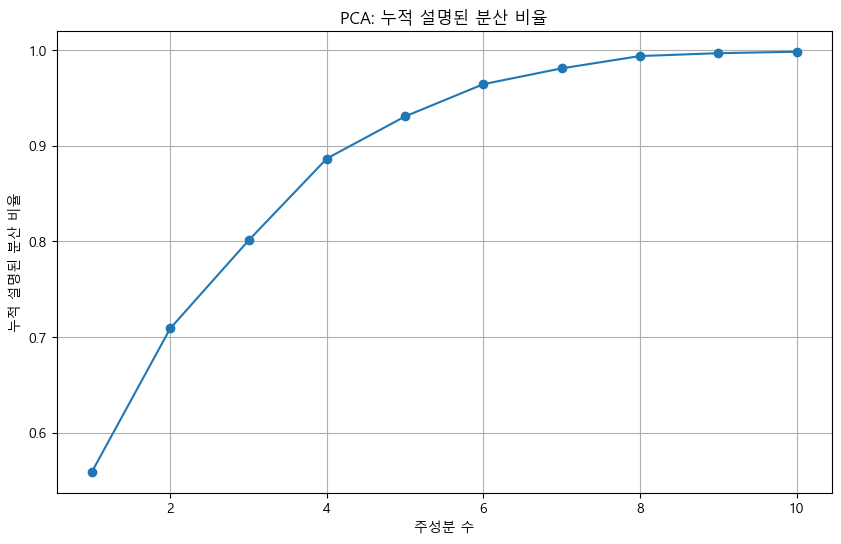

In [241]:
import numpy as np

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('주성분 수')
plt.ylabel('누적 설명된 분산 비율')
plt.title('PCA: 누적 설명된 분산 비율')
plt.grid(True)
plt.show()

---
## 주성분 개수에 따른, 로지스틱회귀 모델 예측

'acc : [0.6666666666666666, 0.6767025089605735, 0.7118279569892473, 0.7204301075268817, 0.717562724014337, 0.7405017921146954, 0.7419354838709677, 0.7419354838709677, 0.7412186379928315, 0.7376344086021506]'

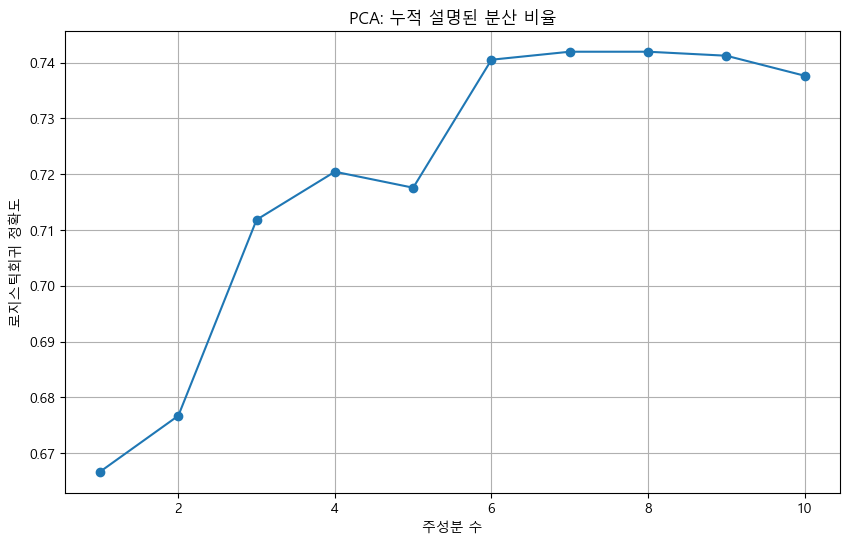

In [348]:
acc = []

for cnt in range(1, 11):
    # PCA 객체 생성
    pca = PCA(n_components=cnt)
    # 훈련 데이터에 PCA 적용
    X_train_pca = pca.fit_transform(X_train_scaled)
    # 테스트 데이터에 PCA 적용
    X_test_pca = pca.transform(X_test_scaled)
    
    # 로지스틱 회귀 모델 생성 및 학습
    logreg = LogisticRegression(random_state=42)
    logreg.fit(X_train_pca, y_train)
    
    # 테스트 데이터로 예측
    y_pred = logreg.predict(X_test_pca)

    # print(f'======================================')
    # print(f'cnt : {cnt}')
    # print(classification_report(y_test, y_pred))
    acc.append(accuracy_score(y_test, y_pred))

display(f'acc : {acc}')
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(acc) + 1), acc, marker='o')
plt.xlabel('주성분 수')
plt.ylabel('로지스틱회귀 정확도')
plt.title('PCA: 누적 설명된 분산 비율')
plt.grid(True)
plt.show()

### PCA(주성분분석) 추출 6개

In [319]:
# PCA 객체 생성
pca = PCA(n_components=6)

# 훈련 데이터에 PCA 적용
X_train_pca = pca.fit_transform(X_train_scaled)

# 테스트 데이터에 PCA 적용
X_test_pca = pca.transform(X_test_scaled)

# 설명된 분산 비율 출력
print("설명된 분산 비율:", pca.explained_variance_ratio_)

설명된 분산 비율: [0.55905663 0.14982938 0.09191569 0.0856504  0.04407958 0.03369151]


### 로지스틱 회귀 모델 학습 및 예측

In [321]:
# 로지스틱 회귀 모델 생성 및 학습
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_pca, y_train)

# 테스트 데이터로 예측
y_pred = logreg.predict(X_test_pca)

### 모델 평가


In [324]:
# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

# 분류 보고서 출력
print("\n분류 보고서:")
print(classification_report(y_test, y_pred))

정확도: 0.7405017921146954

분류 보고서:
              precision    recall  f1-score   support

           0       0.74      0.35      0.47       466
           1       0.74      0.94      0.83       929

    accuracy                           0.74      1395
   macro avg       0.74      0.64      0.65      1395
weighted avg       0.74      0.74      0.71      1395



In [295]:
list(range(1, 10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

### 혼동행렬 확인

Text(51.722222222222214, 0.5, '실제 값')

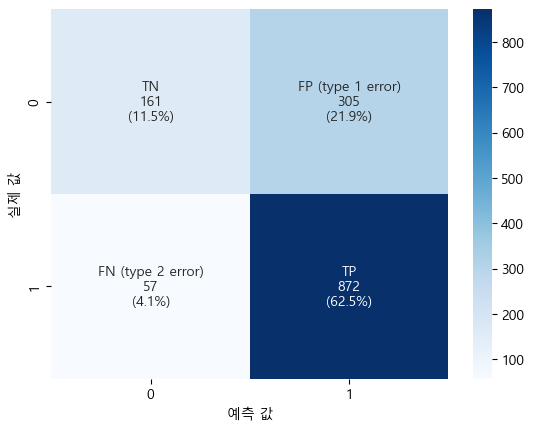

In [334]:
#sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')

# confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# annotation 준비
group_names = ["TN", "FP (type 1 error)", "FN (type 2 error)", "TP"]
group_counts = [value for value in cf_matrix.flatten()]
group_percentages = [f"{value:.1%}" for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n({v3})" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# 시각화
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel('예측 값')
plt.ylabel('실제 값')


---
## 분석모델에 따른 예측모델 성능비교
- 분석모델 : LogisticRegression, DecisionTreeClassifier, RandomForestClassifier
- 

In [336]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

X_train = X_train_pca
X_test = X_test_pca

# 분류 모델 정의 및 하이퍼파라미터 설정 (GridSearch)
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=200),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [3, 5, 10],
            'criterion': ['gini', 'entropy']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [5, 10],
            'criterion': ['gini', 'entropy']
        }
    }
}

# 모델 학습 및 평가
for model_name, mp in models.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5)
    clf.fit(X_train, y_train)
    
    print(f"Best parameters for {model_name}: {clf.best_params_}")
    
    # 테스트 데이터로 예측 수행
    y_pred = clf.predict(X_test)
    
    # 혼동 행렬 출력
    print(f"\nConfusion Matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))
    
    # 분류 보고서 출력
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}

Confusion Matrix for Logistic Regression:
[[159 307]
 [ 57 872]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.74      0.34      0.47       466
           1       0.74      0.94      0.83       929

    accuracy                           0.74      1395
   macro avg       0.74      0.64      0.65      1395
weighted avg       0.74      0.74      0.71      1395

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10}

Confusion Matrix for Decision Tree:
[[247 219]
 [154 775]]

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.62      0.53      0.57       466
           1       0.78      0.83      0.81       929

    accuracy                           0.73      1395
   macro avg       0.70      0.68      0.69      1395
weighted avg       0.72      0.73      0